# Stage One: Dynamic Differences (Revised Version)

Modifed version of supplementary material from "Brunk, Elizabeth,et al. "Characterizing strain variation in engineered *E. coli* using a multi-omics-based workflow." Cell Systems 2.5 (2016): 335-346.

In [1]:
import os
%matplotlib inline

# COBRA (genome-scale modeling) module and tools
import cobra
import cobra.io
from cobra import Model, Reaction, Metabolite
from cobra.io.mat import load_matlab_model
from cobra.io.mat import save_matlab_model
from scipy.io import loadmat, savemat
from cobra.flux_analysis import variability
import theseus   # 

# Panda python module for dataframe and data storage/manipulation
import pandas as pd
pd.set_option('mode.use_inf_as_na',True)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 999)
pd.set_option('precision', 3)

# seaborn visualization tools
import seaborn as sns
sns.set(style="white")
c1, c2, c3, c4, c5, c6, c7, c8, c9, c10 = sns.color_palette("Set2", 10)
b1, b2, b3, b4, b5, b6 = sns.color_palette("Blues")

# other
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

# statistical and math toolkits
import numpy as np
import scipy.io
print("I'm using scipy version:" )
scipy.__version__

pd.set_option('display.max_rows', 1000)

I'm using scipy version:


## Loading All Metabolomics Data

In [2]:
EC_data = './data/'

# isopentenol producing strains
I1_data = pd.read_csv(EC_data+'I1.csv',index_col=0)
I2_data = pd.read_csv(EC_data+'I2.csv',index_col=0)
I3_data = pd.read_csv(EC_data+'I3.csv',index_col=0)

# limonene producing strains
L1_data = pd.read_csv(EC_data+'L1.csv',index_col=0)
L2_data = pd.read_csv(EC_data+'L2.csv',index_col=0)
L3_data = pd.read_csv(EC_data+'L3.csv',index_col=0)

# bisabolene producing strains
B1_data = pd.read_csv(EC_data+'B1.csv',index_col=0)
B2_data = pd.read_csv(EC_data+'B2.csv',index_col=0)

# wild-type strain
DH1_data = pd.read_csv(EC_data+'DH1.csv',index_col=0)

# Dictionary of all strain data
met_data ={'I1':I1_data, 'I2':I2_data, 'I3':I3_data, 'L1':L1_data, 'L2':L2_data, 'L3':L3_data, 'B1':B1_data, 'B2':B2_data, 'DH1':DH1_data}

# Pandas dataframe of all strain data
DF_metabolite_conc_all = pd.DataFrame()
for strain in met_data.keys():
    DF_metabolite_conc_all = pd.concat([DF_metabolite_conc_all, met_data[strain]])
DF_metabolite_conc_all

Hour Strain  Sample  OD600  Intracellular volume / sample  glc__D_e  \
0       0     I1       1  1.660                      8.300e-07    58.764   
1       2     I1      10  0.000                      0.000e+00    52.737   
2       4     I1      19  2.240                      5.600e-07    48.139   
3       6     I1      28  0.000                      0.000e+00    44.761   
4       8     I1      37  2.690                      6.730e-07    40.254   
5      10     I1      46  0.000                      0.000e+00    37.703   
6      12     I1      55  2.816                      7.040e-07    37.547   
7      16     I1      64  0.000                      0.000e+00    34.698   
8      18     I1      73  2.865                      7.160e-07    34.524   
9      20     I1      82  0.000                      0.000e+00    33.218   
10     24     I1      91  2.763                      6.910e-07    33.674   
11     36     I1     100  3.000                      7.500e-07    32.485   
12     48     I1     109  3.000                      7.500e-07    29.613   
13     72     I1     118  3.070                      7.680e-07    12.047   
14      0     I2       2  0.612                      3.060e-07    59.614   
15      2     I2      11  0.000                      0.000e+00    56.434   
16      4     I2      20  2.212                      5.530e-07    51.120   
17      6     I2      29  0.000                      0.000e+00    48.438   
18      8     I2      38  2.932                      7.330e-07    42.785   
19     10     I2      47  0.000                      0.000e+00    36.260   
20     12     I2      56  3.492                      8.730e-07    32.481   
21     16     I2      65  0.000                      0.000e+00    25.947   
22     18     I2      74  3.643                      9.110e-07    21.715   
23     20     I2      83  0.000                      0.000e+00    16.461   
24     24     I2      92  3.838                      9.600e-07    11.172   
25     36     I2     101  3.365                      8.410e-07     0.273   
26     48     I2     110  3.365                      8.410e-07     0.000   
27     72     I2     119  3.160                      7.900e-07     0.000   
28      0     I3       3  1.473                      7.360e-07    58.827   
29      2     I3      12  0.000                      0.000e+00    52.747   
30      4     I3      21  2.731                      6.830e-07    47.257   
31      6     I3      30  0.000                      0.000e+00    43.559   
32      8     I3      39  3.436                      8.590e-07    39.603   
33     10     I3      48  0.000                      0.000e+00    35.478   
34     12     I3      57  3.676                      9.190e-07    32.138   
35     16     I3      66  0.000                      0.000e+00    26.478   
36     18     I3      75  3.522                      8.810e-07    22.166   
37     20     I3      84  0.000                      0.000e+00    16.682   
38     24     I3      93  3.609                      9.020e-07    11.593   
39     36     I3     102  3.143                      7.860e-07     0.583   
40     48     I3     111  3.143                      7.860e-07     0.000   
41     72     I3     120  3.041                      7.600e-07     0.000   
70      0     L1       6  1.326                      6.630e-07    59.325   
71      2     L1      15  0.000                      0.000e+00    52.168   
72      4     L1      24  2.967                      7.420e-07    46.923   
73      6     L1      33  0.000                      0.000e+00    43.110   
74      8     L1      42  3.361                      8.400e-07    40.014   
75     10     L1      51  0.000                      0.000e+00    36.344   
76     12     L1      60  3.285                      8.210e-07    35.139   
77     16     L1      69  0.000                      0.000e+00    32.431   
78     18     L1      78  3.449                      8.620e-07    32.854   
79     20     L1      87  0.000                      

### Reading I1 Metabolomics Data

In [3]:
I1_data = pd.read_csv(EC_data+'I1.csv',index_col=0)
I1_data

Hour Strain  Sample  OD600  Intracellular volume / sample  glc__D_e  \
0      0     I1       1  1.660                      8.300e-07    58.764   
1      2     I1      10  0.000                      0.000e+00    52.737   
2      4     I1      19  2.240                      5.600e-07    48.139   
3      6     I1      28  0.000                      0.000e+00    44.761   
4      8     I1      37  2.690                      6.730e-07    40.254   
5     10     I1      46  0.000                      0.000e+00    37.703   
6     12     I1      55  2.816                      7.040e-07    37.547   
7     16     I1      64  0.000                      0.000e+00    34.698   
8     18     I1      73  2.865                      7.160e-07    34.524   
9     20     I1      82  0.000                      0.000e+00    33.218   
10    24     I1      91  2.763                      6.910e-07    33.674   
11    36     I1     100  3.000                      7.500e-07    32.485   
12    48     I1     109  3.000                      7.500e-07    29.613   
13    72     I1     118  3.070                      7.680e-07    12.047   

    pyr_e  succ_e  lac__D_e  for_e    ac_e  ipoh_e  bis_e  lim_e  aacoa_c  \
0   0.560   0.097     0.582  1.406   7.697   0.000      0      0        0   
1   0.058   1.987     4.418  5.487  15.661   0.000      0      0        0   
2   0.045   1.906     6.749  2.060  18.430   0.692      0      0        0   
3   0.111   1.936     9.657  2.775  20.056   0.000      0      0        0   
4   0.719   1.994    13.328  2.925  21.697   1.275      0      0        0   
5   0.874   1.987    14.226  3.534  23.414   0.000      0      0        0   
6   0.871   1.933    14.142  3.300  25.549   1.333      0      0        0   
7   0.835   1.846    13.614  3.443  26.765   0.000      0      0        0   
8   0.773   1.915    13.782  3.166  29.093   1.434      0      0        0   
9   0.643   1.881    13.338  3.121  30.259   0.000      0      0        0   
10  0.583   1.918    13.557  2.783  32.779   1.566      0      0        0   
11  0.461   2.070    13.830  3.638  37.523   1.636      0      0        0   
12  0.441   2.007    13.356  3.099  39.292   1.787      0      0        0   
13  0.244   0.906     6.792  1.546  20.397   2.014      0      0        0   

     hmgcoa_c    mev_R_c    5pmev_c  ipdp_c       ip_c     grdp_c  frdp_c  \
0   0.000e+00  3.480e-06  1.650e-05   0.003  0.000e+00  0.000e+00       0   
1   0.000e+00  0.000e+00  0.000e+00   0.000  0.000e+00  0.000e+00       0   
2   6.890e-05  2.753e-04  9.387e-04   0.018  3.969e-03  0.000e+00       0   
3   0.000e+00  0.000e+00  0.000e+00   0.000  0.000e+00  0.000e+00       0   
4   0.000e+00  5.951e-04  1.216e-03   0.017  3.298e-03  0.000e+00       0   
5   0.000e+00  0.000e+00  0.000e+00   0.000  0.000e+00  0.000e+00       0   
6   5.350e-05  5.230e-04  2.647e-03   0.033  4.269e-03  4.490e-06       0   
7   0.000e+00  0.000e+00  0.000e+00   0.000  0.000e+00  0.000e+00       0   
8   9.140e-05  6.733e-04  1.759e-03   0.025  2.493e-03  4.080e-06       0   
9   0.000e+00  0.000e+00  0.000e+00   0.000  0.000e+00  0.000e+00       0   
10  1.027e-04  7.070e-04  1.240e-03   0.021  2.272e-03  2.950e-06       0   
11  0.000e+00  6.358e-04  7.223e-04   0.018  1.374e-03  0.000e+00       0   
12  1.310e-04  6.454e-04  7.431e-04   0.016  1.166e-03  0.000e+00       0   
13  0.000e+00  5.361e-04  5.284e-04   0.009  7.205e-04  0.000e+00       0   

        amp_c      adp_c      atp_c      nad_c     nadp_c    accoa_c  fdp_c  \
0   1.714e-04  7.170e-05  2.214e-04  4.793e-04  6.080e-05  1.969e-04  0.005   
1   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000   
2   3.153e-04  1.891e-04  3.791e-04  1.829e-03  2.212e-04  4.923e-04  0.005   
3   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000   
4   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.004   
5   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000   
6   2.303e-04

In [4]:
met_data

{'I1':     Hour Strain  Sample  OD600  Intracellular volume / sample  glc__D_e  \
 0      0     I1       1  1.660                      8.300e-07    58.764   
 1      2     I1      10  0.000                      0.000e+00    52.737   
 2      4     I1      19  2.240                      5.600e-07    48.139   
 3      6     I1      28  0.000                      0.000e+00    44.761   
 4      8     I1      37  2.690                      6.730e-07    40.254   
 5     10     I1      46  0.000                      0.000e+00    37.703   
 6     12     I1      55  2.816                      7.040e-07    37.547   
 7     16     I1      64  0.000                      0.000e+00    34.698   
 8     18     I1      73  2.865                      7.160e-07    34.524   
 9     20     I1      82  0.000                      0.000e+00    33.218   
 10    24     I1      91  2.763                      6.910e-07    33.674   
 11    36     I1     100  3.000                      7.500e-07    32.485   
 12   

### Drop the columns not used in metabolite analysis

In [5]:
DF_metabolite_conc_all = DF_metabolite_conc_all.drop(columns = ['Cystine','Intracellular volume / sample','OD600','Sample','fold_production'])
print(' ')
print("List of strains in pandas metabolite dataframe:", DF_metabolite_conc_all.Strain.unique().tolist())
DF_metabolite_conc_all[0:10] # Show all the column names that remain

 
List of strains in pandas metabolite dataframe: ['I1', 'I2', 'I3', 'L1', 'L2', 'L3', 'B1', 'B2', 'DH1']


Hour Strain  glc__D_e  pyr_e  succ_e  lac__D_e  for_e    ac_e  ipoh_e  \
0     0     I1    58.764  0.560   0.097     0.582  1.406   7.697   0.000   
1     2     I1    52.737  0.058   1.987     4.418  5.487  15.661   0.000   
2     4     I1    48.139  0.045   1.906     6.749  2.060  18.430   0.692   
3     6     I1    44.761  0.111   1.936     9.657  2.775  20.056   0.000   
4     8     I1    40.254  0.719   1.994    13.328  2.925  21.697   1.275   
5    10     I1    37.703  0.874   1.987    14.226  3.534  23.414   0.000   
6    12     I1    37.547  0.871   1.933    14.142  3.300  25.549   1.333   
7    16     I1    34.698  0.835   1.846    13.614  3.443  26.765   0.000   
8    18     I1    34.524  0.773   1.915    13.782  3.166  29.093   1.434   
9    20     I1    33.218  0.643   1.881    13.338  3.121  30.259   0.000   

   bis_e  lim_e  aacoa_c   hmgcoa_c    mev_R_c    5pmev_c  ipdp_c   ip_c  \
0    0.0    0.0        0  0.000e+00  3.480e-06  1.650e-05   0.003  0.000   
1    0.0    0.0        0  0.000e+00  0.000e+00  0.000e+00   0.000  0.000   
2    0.0    0.0        0  6.890e-05  2.753e-04  9.387e-04   0.018  0.004   
3    0.0    0.0        0  0.000e+00  0.000e+00  0.000e+00   0.000  0.000   
4    0.0    0.0        0  0.000e+00  5.951e-04  1.216e-03   0.017  0.003   
5    0.0    0.0        0  0.000e+00  0.000e+00  0.000e+00   0.000  0.000   
6    0.0    0.0        0  5.350e-05  5.230e-04  2.647e-03   0.033  0.004   
7    0.0    0.0        0  0.000e+00  0.000e+00  0.000e+00   0.000  0.000   
8    0.0    0.0        0  9.140e-05  6.733e-04  1.759e-03   0.025  0.002   
9    0.0    0.0        0  0.000e+00  0.000e+00  0.000e+00   0.000  0.000   

      grdp_c  frdp_c      amp_c      adp_c      atp_c      nad_c     nadp_c  \
0  0.000e+00     0.0  1.714e-04  7.170e-05  2.214e-04  4.793e-04  6.080e-05   
1  0.000e+00     0.0  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00   
2  0.000e+00     0.0  3.153e-04  1.891e-04  3.791e-04  1.829e-03  2.212e-04   
3  0.000e+00     0.0  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00   
4  0.000e+00     0.0  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00   
5  0.000e+00     0.0  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00   
6  4.490e-06     0.0  2.303e-04  8.620e-05  1.572e-04  1.931e-03  2.648e-04   
7  0.000e+00     0.0  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00   
8  4.080e-06     0.0  1.501e-04  6.680e-05  9.690e-05  1.697e-03  1.824e-04   
9  0.000e+00     0.0  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00   

     accoa_c  fdp_c  3pg_c      pep_c      pyr_c  lac__D_c      fum_c  \
0  1.969e-04  0.005  0.001  2.380e-05  2.564e-03     0.014  4.481e-04   
1  0.000e+00  0.000  0.000  0.000e+00  0.000e+00     0.000  0.000e+00   
2  4.923e-04  0.005  0.002  5.040e-05  1.671e-04     0.124  5.649e-04   
3  0.000e+00  0.000  0.000  0.000e+00  0.000e+00     0.000  0.000e+00   
4  0.000e+00  0.004  0.002  4.380e-05  1.946e-03     0.213  5.233e-04   
5  0.000e+00  0.000  0.000  0.000e+00  0.000e+00     0.000  0.000e+00   
6  4.491e-04  0.002  0.000  2.490e-05  3.411e-04     0.149  5.168e-04   
7  0.000e+00  0.000  0.000  0.000e+00  0.000e+00     0.000  0.000e+00   
8  3.434e-04  0.000  0.000  2.390e-05  5.016e-04     0.161  6.246e-04   
9  0.000e+00  0.000  0.000  0.000e+00  0.000e+00     0.000  0.000e+00   

      succ_c  oxalcoa_c   mal__L_c      akg_c  acon__C_c      cit_c  \
0  2.844e-03          0  3.374e-04  3.900e-05  1.710e-05  5.150e-05   
1  0.000e+00          0  0.000e+00  0.000e+00  0.000e+00  0.000e+00   
2  5.859e-03          0  4.579e-04  2.810e-05  6.220e-05  7.630e-05   
3  0.000e+00          0  0.000e+00  0.000e+00  0.000e+00  0.000e+00   
4  5.969e-03          0  4.227e-04  1.520e-05  8.630e-05  7.520e-05   
5  0.000e+00          0  0.000e+00  0.000e+00  0.000e+00  0.000e+00   
6  2.019e-03          0  4.706e-04  0.000e+00  5.900e-05  4.730e-05   
7  0.000e+00          0  0.000e+00  0.000e+00  0.000e+00  0.000e+00   
8  9.084e-04    

## Loading Proteomics Data

In [6]:
I1_prot_data_cobra = pd.read_csv(EC_data+'I1_prot.csv',index_col=0)
I2_prot_data_cobra = pd.read_csv(EC_data+'I2_prot.csv',index_col=0)
I3_prot_data_cobra = pd.read_csv(EC_data+'I3_prot.csv',index_col=0)
L1_prot_data_cobra = pd.read_csv(EC_data+'L1_prot.csv',index_col=0)
L2_prot_data_cobra = pd.read_csv(EC_data+'L2_prot.csv',index_col=0)
L3_prot_data_cobra = pd.read_csv(EC_data+'L3_prot.csv',index_col=0)
B1_prot_data_cobra = pd.read_csv(EC_data+'B1_prot.csv',index_col=0)
B2_prot_data_cobra = pd.read_csv(EC_data+'B2_prot.csv',index_col=0)
DH1_prot_data_cobra = pd.read_csv(EC_data+'DH1_prot.csv',index_col=0)

prot_data ={'I1':I1_prot_data_cobra, 'I2':I2_prot_data_cobra, 'I3':I3_prot_data_cobra, 
            'L1':L1_prot_data_cobra, 'L2':L2_prot_data_cobra, 'L3':L3_prot_data_cobra, 
            'B1':B1_prot_data_cobra, 'B2':B2_prot_data_cobra, 'DH1':DH1_prot_data_cobra }

In [7]:
print(' ')
print("Example dataframe of wild-type data:")
DH1_prot_data_cobra[0:10]

 
Example dataframe of wild-type data:


ACACT1r   BISS   HMGR   HMGS  IPDDI   GRTT   LIMS   ERG1   NudB   MVD1  \
0     0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
4    -0.771 -0.433  0.572  1.537 -1.497 -0.250 -2.133 -1.919 -0.953 -1.036   
8    -0.051 -0.082 -0.359  1.408 -1.755 -0.057 -2.326 -2.799  0.124 -2.000   
12   -0.904 -0.363  0.616  1.591 -1.797  0.384 -2.655 -1.610  0.172 -0.898   
18   -1.068  0.078 -0.935  1.184 -2.061  0.390 -2.705 -2.195 -1.383 -0.898   
24   -0.314  0.753 -0.702  1.230 -1.684  0.110 -3.018 -2.585  0.093 -1.427   
36   -1.214  0.176  0.960  0.850 -2.231  0.393 -2.911 -1.662 -1.131 -0.589   
48   -0.585  0.245 -0.082  1.120 -1.813  0.216 -2.231 -2.489 -0.674 -0.803   
72    0.049  0.688 -0.082  1.354 -2.041  0.076 -3.941 -1.421 -0.854 -1.313   

     ERG8    GND   FRD2    PPC    FUM    PFK  SUCDi  FDH4pp  ICDHyr    PFL  \
0   0.000  0.000  0.000  0.000  0.000  0.000  0.000   0.000   0.000  0.000   
4  -1.820 -0.086 -0.121  0.906 -0.608  1.073 -0.597   2.134  -0.202 -0.768   
8  -2.758  0.206  0.281  1.210 -0.301  1.234 -0.786   2.250  -0.004 -0.317   
12 -2.929 -0.145  0.080  1.135 -0.273  1.099 -0.637   2.475  -0.152 -0.452   
18 -5.714  0.036  0.070  1.016 -0.595  1.169 -0.909   2.041   0.060 -0.299   
24 -3.480 -0.015  0.145  1.116 -0.356  1.164 -1.774   2.205   0.011 -0.101   
36 -4.548  0.110  0.047  1.180 -0.266  1.132 -0.664   1.973  -0.080 -0.412   
48 -3.216  0.140  0.143  1.174 -0.434  1.371 -0.660   2.037   0.118  0.027   
72 -3.258 -0.030  0.068  0.999 -0.613  1.082 -3.178   2.172  -0.116 -0.170   

     ACKr    ENO    PGI    PGK    RPI  SUCOAS    TPI   TALA   FRD3    FBA  \
0   0.000  0.000  0.000  0.000  0.000   0.000  0.000  0.000  0.000  0.000   
4  -1.063  0.428  0.613  0.374  0.456  -0.301  1.424  1.579  0.032  0.314   
8  -0.913  0.677  0.910  0.590  0.510  -0.151  1.731  1.742  0.537  0.538   
12 -1.091  0.535  0.593  0.449  0.227  -0.314  1.572  1.722  0.046  0.315   
18 -0.946  0.626  0.715  0.525  0.277  -0.401  1.707  1.716  0.095  0.413   
24 -0.920  0.616  0.847  0.510  0.143  -0.208  1.590  1.690  0.524  0.362   
36 -1.095  0.624  0.828  0.495  0.105  -0.095  1.568  1.740  0.532  0.410   
48 -0.796  0.721  0.925  0.593  0.112  -0.077  1.627  1.800  0.512  0.527   
72 -1.144  0.557  0.759  0.489 -0.075  -0.380  1.455  1.596  0.184  0.328   

     GAPD    FBP   PTAr    PDH  ACALD    FHL     CS  G6PDH2r    PYK  AKGDH  \
0   0.000  0.000  0.000  0.000  0.000  0.000  0.000    0.000  0.000  0.000   
4   0.204 -0.893 -0.594 -0.775  0.361 -0.237  0.262    0.159  0.003 -0.634   
8   0.402 -0.440 -0.398 -0.610  0.646 -0.302  0.546    0.353  0.229 -0.473   
12  0.222 -0.502 -0.689 -0.626  0.503  0.108  0.434    0.208  0.053 -0.586   
18  0.303 -0.680 -0.457 -0.563  0.563  0.023  0.422    0.305  0.162 -0.551   
24  0.175 -0.651 -0.414 -0.518  0.554  0.036  0.450    0.323  0.331 -0.472   
36  0.127 -0.613 -0.346 -0.571  0.630 -0.045  0.463    0.235  0.321 -0.438   
48  0.312 -0.618 -0.472 -0.563  0.661  0.076  0.578    0.293  0.394 -0.418   
72  0.072 -0.701 -0.537 -0.816  0.454  0.087  0.379    0.229  0.225 -0.638   

    PDXPP   PPCK    PPS  ACONTa    ME1   TKT1    ACS   TKT2   MDH2  ACONTb  \
0   0.000  0.000  0.000   0.000  0.000  0.000  0.000  0.000  0.000   0.000   
4  -0.491 -1.089  0.197   2.092  0.081 -0.160  0.038  3.464 -1.140  -0.179   
8  -0.903 -0.836  0.375   2.452  0.189 -0.017  0.123  3.665 -0.842  -0.160   
12 -0.878 -1.023  0.333   2.180  0.071 -0.186  0.204  3.500 -1.045  -0.538   
18 -1.020 -1.006  0.336   2.348  0.252 -0.033  0.100  3.659 -0.970  -0.730   
24 -0.941 -0.725  0.370   2.288  0.221 -0.123  0.402  3.586 -1.095  -0.816   
36 -0.993 -0.649  0.383   2.271  0.290 -0.222  0.147  3.619 -0.943  -0.802   
48 -0.841 -0.705  0.621   2.399  0.110 -0.069 -0.093  3.737 -0.669  -0.617   
72 -1.163 -0.854  0.367   2.198  0.046 -0.230 -0.237  3.459 -1.217  -0.746   

      PGM    MDH    ME2  YPL069C  GLYCL  
0   0.000  0.000  0.000    0.000  0.000  
4   0.318  0.718 -0.466  

In [8]:
prot_data

{'I1':     ACACT1r   BISS   HMGR   HMGS  IPDDI   GRTT   LIMS   ERG1   NudB   MVD1  \
 0     0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
 4     8.754 -0.043  0.526  4.998  0.730  0.131  0.216  1.088  6.746  5.941   
 8     8.643  0.339 -0.372  4.881  0.898 -0.252 -0.047  0.985  6.653  5.788   
 12    8.839  0.322  0.067  5.113  1.607  0.188  1.255  1.220  6.828  6.050   
 18    8.710 -0.387 -0.076  4.857  0.447 -0.153 -0.047  0.920  6.735  5.806   
 24    8.753  0.160 -0.196  4.988  1.199 -0.052  0.600  0.891  6.717  5.865   
 36    8.699  0.667 -0.371  4.916  1.155 -0.177 -1.147  0.920  6.620  5.887   
 48    9.106  1.011  0.236  5.368  1.596  0.258  0.600  1.293  7.155  6.260   
 72    8.696  0.497 -0.231  5.037  1.227 -0.017  0.403  0.825  6.721  5.998   
 
      ERG8    GND   FRD2    PPC    FUM    PFK  SUCDi  FDH4pp  ICDHyr    PFL  \
 0   0.000  0.000  0.000  0.000  0.000  0.000  0.000   0.000   0.000  0.000   
 4   1.251  0.104  0.401  0.892  0.583  1.44

## Compute errors from triplicate measurements in wild-type and isopentenol strains

In [9]:
# estimate error (%RSD) from triplicate proteomic and metabolomic data sets:

endo_data = pd.read_csv('./data/endometabolomic_triplicate_data.csv',index_col=0)
exo_data = pd.read_csv('./data/exometabolomic_triplicate_data.csv',index_col=0)

DF_endo_avg_metabolomics_cobra_conc = pd.read_csv('./data/endometabolomic_error_estimates.csv',index_col=0)
DF_exo_avg_metabolomics_cobra_conc = pd.read_csv('./data/exometabolomic_error_estimates.csv',index_col=0)

proteomics_triplicate_data = pd.read_csv('./data/proteomic_triplicate_data.csv',index_col=0)
DF_proteomics_avg_std_rsd_peak_areas = pd.read_csv('./data/proteomic_triplicate_data.csv', index_col=0)

### Metabolomics data

#### Intracellular metabolomics triplicate data

In [10]:
endo_data[0:30]

Strain  Hour  Replicate  OD600   pyr_c  oaa_c  lac__D_c  succ_c  mal__L_c  \
0      WT   0.0          1  0.714  12.242  0.176    10.847   3.382     1.257   
1      WT   0.0          2  0.708  19.639  0.299    18.745   6.009     1.834   
2      WT   0.0          3  0.710  12.125  0.320    11.323   4.436     1.503   
3      I1   0.0          1  0.501   8.884  0.256     9.971   2.039     1.046   
4      I1   0.0          2  0.471  15.926  0.255    17.846   3.740     1.610   
5      I1   0.0          3  0.502  12.259  0.309    15.110   3.336     1.483   
6      I2   0.0          1  0.519  15.118  0.290    17.621   4.161     1.712   
7      I2   0.0          2  0.572  16.617  0.383    24.912   4.726     1.822   
8      I2   0.0          3  0.588  12.671  0.208    21.045   4.077     1.525   
9      I3   0.0          1  0.443  13.343  0.230    17.665   3.501     1.611   
10     I3   0.0          2  0.412  11.984  0.450    15.897   3.275     1.527   
11     I3   0.0          3  0.408  13.320  0.214    16.968   3.511     1.659   
12     WT   0.5          1  1.049   7.022  0.706    14.435   6.013     1.165   
13     WT   0.5          2  1.090  10.609  0.566    14.214   7.767     1.413   
14     WT   0.5          3  1.088   6.660  0.556    10.812   6.886     1.158   
15     I1   0.5          1  0.745  14.445  0.000     9.326   3.173     1.334   
16     I1   0.5          2  0.778  21.160  0.152    13.464   4.714     1.786   
17     I1   0.5          3  0.771  17.600  0.000    20.374   5.464     1.712   
18     I2   0.5          1  0.836  21.099  0.278    13.595   5.200     1.728   
19     I2   0.5          2  0.869  24.579  0.345    16.868   6.120     1.958   
20     I2   0.5          3  0.917  13.905  0.164    10.184   4.348     1.322   
21     I3   0.5          1  0.665  12.465  0.236    17.655   4.050     1.527   
22     I3   0.5          2  0.654  16.540  0.225    21.980   4.642     1.724   
23     I3   0.5          3  0.701  12.490  0.000    13.075   4.412     1.519   
24     WT   1.0          1  1.445   0.963  0.890    13.992  10.036     0.924   
25     WT   1.0          2  1.542   0.878  1.290    12.596  10.963     0.817   
26     WT   1.0          3  1.530   1.100  0.934    14.548  11.231     0.910   
27     I1   1.0          1  0.997   7.047  0.146    16.195   5.284     1.246   
28     I1   1.0          2  1.064   9.718  0.000    16.886   5.456     1.323   
29     I1   1.0          3  1.031  13.225  0.183    14.519   6.679     1.514   

    akg_c  acon__C_c  cit_c  mev_R_c   ip_c  dxyl5p_c  2me4p_c  5dpmev_c  \
0   0.097      0.000  0.234    0.000  0.000     0.049    0.000     0.000   
1   0.180      0.000  0.496    0.000  0.000     0.084    0.000     0.000   
2   0.182      0.000  0.468    0.000  0.000     0.077    0.000     0.000   
3   0.098      0.000  0.155    0.000  0.092     0.015    0.000     0.000   
4   0.234      0.000  0.356    0.000  0.162     0.036    0.000     0.009   
5   0.212      0.000  0.384    0.000  0.183     0.038    0.000     0.009   
6   0.181      0.000  0.376    0.000  0.070     0.062    0.035     0.000   
7   0.160      0.000  0.409    0.000  0.062     0.055    0.037     0.005   
8   0.145      0.000  0.318    0.000  0.058     0.048    0.029     0.000   
9   0.182      0.000  0.325    0.000  0.072     0.045    0.029     0.004   
10  0.148      0.000  0.408    0.000  0.075     0.044    0.026     0.000   
11  0.184      0.000  0.318    0.000  0.072     0.047    0.028     0.000   
12  0.353      0.040  0.763    0.000  0.000     0.082    0.035     0.000   
13  0.331      0.042  0.764    0.000  0.000     0.094    0.048     0.000   
14  0.266      0.042  0.699    0.000  0.000     0.084    0.041     0.000   
15  0.085      0.000  0.131    0.046  0.655     0.017    0.000     0.008   
16  0.168      0.000  0.241    0.065  1.157     0.016    0.000     0.010   
17  0.169      0.000  0.253    0.072  1.451     0.032    0.000     0.013   
18  0.195      0.000  0.324    0.015  0.953     0.085    0.052     0.009   
19

Find triplicate values for a single strain

In [11]:
endo_data[endo_data.Strain == 'WT']

Strain  Hour  Replicate  OD600   pyr_c  oaa_c  lac__D_c  succ_c  mal__L_c  \
0      WT   0.0          1  0.714  12.242  0.176    10.847   3.382     1.257   
1      WT   0.0          2  0.708  19.639  0.299    18.745   6.009     1.834   
2      WT   0.0          3  0.710  12.125  0.320    11.323   4.436     1.503   
12     WT   0.5          1  1.049   7.022  0.706    14.435   6.013     1.165   
13     WT   0.5          2  1.090  10.609  0.566    14.214   7.767     1.413   
14     WT   0.5          3  1.088   6.660  0.556    10.812   6.886     1.158   
24     WT   1.0          1  1.445   0.963  0.890    13.992  10.036     0.924   
25     WT   1.0          2  1.542   0.878  1.290    12.596  10.963     0.817   
26     WT   1.0          3  1.530   1.100  0.934    14.548  11.231     0.910   
36     WT   2.0          1  2.117   3.665  1.805    78.743  20.133     0.955   
37     WT   2.0          2  2.186   4.325  1.955   117.559  23.060     1.180   
38     WT   2.0          3  2.179   4.638  1.883   126.744  24.957     1.163   
48     WT   3.0          1  2.661   6.770  2.048    97.733  21.300     0.777   
49     WT   3.0          2  2.700   6.790  2.022   101.472  22.516     0.851   
50     WT   3.0          3  2.688   7.476  2.147   106.450  21.517     0.817   

    akg_c  acon__C_c  cit_c  mev_R_c  ip_c  dxyl5p_c  2me4p_c  5dpmev_c  \
0   0.097      0.000  0.234    0.000   0.0     0.049    0.000       0.0   
1   0.180      0.000  0.496    0.000   0.0     0.084    0.000       0.0   
2   0.182      0.000  0.468    0.000   0.0     0.077    0.000       0.0   
12  0.353      0.040  0.763    0.000   0.0     0.082    0.035       0.0   
13  0.331      0.042  0.764    0.000   0.0     0.094    0.048       0.0   
14  0.266      0.042  0.699    0.000   0.0     0.084    0.041       0.0   
24  0.390      0.069  1.328    0.010   0.0     0.155    0.086       0.0   
25  0.375      0.073  1.553    0.011   0.0     0.170    0.090       0.0   
26  0.357      0.078  1.313    0.012   0.0     0.163    0.101       0.0   
36  0.353      0.107  2.253    0.009   0.0     0.220    0.000       0.0   
37  0.521      0.149  2.164    0.013   0.0     0.238    0.000       0.0   
38  0.487      0.156  2.401    0.013   0.0     0.262    0.000       0.0   
48  0.426      0.165  2.588    0.013   0.0     0.197    0.000       0.0   
49  0.426      0.181  2.713    0.012   0.0     0.200    0.000       0.0   
50  0.406      0.171  2.271    0.011   0.0     0.189    0.000       0.0   

    ex_con.id  h2mb4p_c  2mecdp_c  4c2me_c   gly_c  ala__L_c  pro__L_c  \
0       0.003         0       0.0    0.023   8.819     3.408     6.860   
1       0.006         0       0.0    0.042  11.611     4.149     8.531   
2       0.004         0       0.0    0.042   8.236     3.317     6.284   
12      0.004         0       0.0    0.061  10.283     3.882     7.545   
13      0.003         0       0.0    0.068  14.072     4.635     9.633   
14      0.003         0       0.0    0.065  12.157     4.195     8.589   
24      0.004         0       0.0    0.137  12.290     4.221     8.891   
25      0.003         0       0.0    0.151  10.515     4.233     8.851   
26      0.003         0       0.0    0.179  13.042     4.601     9.616   
36      0.000         0       0.0    0.065   7.743     4.575     9.953   
37      0.006         0       0.0    0.068  10.763     5.079    11.641   
38      0.006         0       0.0    0.076  12.699     5.143    12.223   
48      0.000         0       0.0    0.030   5.275     3.265    16.541   
49      0.007         0       0.0    0.035   7.341     3.615    19.742   
50      0.006         0       0.0    0.033   8.714     3.994    20.187   

    val__L_c  Betaine  thr__L_c  cys__L_c  leu__L_c  ile__L_c  asn__L_c  \
0      2.472    1.586     1.610     0.044     7.432     7.830     8.354   
1      2.791    2.061     2.121     0.069     8.796     9.894    10.485   
2      2.238    1.670     1.440     0.048     6.548     7.293     6.706   
12     2.324    2.725     2.161     

### Intracellular average  metabolomics concentrations

In [12]:
DF_endo_avg_metabolomics_cobra_conc[0:30]

Hour  avg_conc metabolite  std_conc strain   var_conc   %RSD
0    0.0     0.711      OD600     0.002     WT  6.222e-06  0.004
1    0.0    14.669      pyr_c     3.515     WT  1.235e+01  0.240
2    0.0     0.265      oaa_c     0.063     WT  4.028e-03  0.240
3    0.0    13.638   lac__D_c     3.616     WT  1.308e+01  0.265
4    0.0     4.609     succ_c     1.079     WT  1.165e+00  0.234
5    0.0     1.532   mal__L_c     0.237     WT  5.596e-02  0.154
6    0.0     0.153      akg_c     0.040     WT  1.564e-03  0.259
7    0.0     0.000  acon__C_c     0.000     WT  0.000e+00  0.000
8    0.0     0.399      cit_c     0.117     WT  1.375e-02  0.294
9    0.0     0.000    mev_R_c     0.000     WT  0.000e+00  0.000
10   0.0     0.000       ip_c     0.000     WT  0.000e+00  0.000
11   0.0     0.070   dxyl5p_c     0.015     WT  2.258e-04  0.214
12   0.0     0.000    2me4p_c     0.000     WT  0.000e+00  0.000
13   0.0     0.000   5dpmev_c     0.000     WT  0.000e+00  0.000
14   0.0     0.004  ex_con.id     0.001     WT  1.754e-06  0.314
15   0.0     0.000   h2mb4p_c     0.000     WT  0.000e+00  0.000
16   0.0     0.000   2mecdp_c     0.000     WT  0.000e+00  0.000
17   0.0     0.036    4c2me_c     0.009     WT  8.543e-05  0.258
18   0.0     9.556      gly_c     1.473     WT  2.169e+00  0.154
19   0.0     3.625   ala__L_c     0.372     WT  1.387e-01  0.103
20   0.0     7.225   pro__L_c     0.953     WT  9.083e-01  0.132
21   0.0     2.500   val__L_c     0.227     WT  5.132e-02  0.091
22   0.0     1.772    Betaine     0.207     WT  4.276e-02  0.117
23   0.0     1.724   thr__L_c     0.289     WT  8.369e-02  0.168
24   0.0     0.054   cys__L_c     0.011     WT  1.167e-04  0.201
25   0.0     7.592   leu__L_c     0.925     WT  8.551e-01  0.122
26   0.0     8.339   ile__L_c     1.121     WT  1.257e+00  0.134
27   0.0     8.515   asn__L_c     1.547     WT  2.393e+00  0.182
28   0.0     5.087   asp__L_c     1.859     WT  3.454e+00  0.365
29   0.0     3.014   gln__L_c     0.296     WT  8.758e-02  0.098

Find triplicate values for a single strain

In [13]:
DF_endo_avg_metabolomics_cobra_conc[DF_endo_avg_metabolomics_cobra_conc.strain == 'WT']

Hour  avg_conc metabolite   std_conc strain   var_conc   %RSD
0     0.0     0.711      OD600  2.494e-03     WT  6.222e-06  0.004
1     0.0    14.669      pyr_c  3.515e+00     WT  1.235e+01  0.240
2     0.0     0.265      oaa_c  6.347e-02     WT  4.028e-03  0.240
3     0.0    13.638   lac__D_c  3.616e+00     WT  1.308e+01  0.265
4     0.0     4.609     succ_c  1.079e+00     WT  1.165e+00  0.234
5     0.0     1.532   mal__L_c  2.366e-01     WT  5.596e-02  0.154
6     0.0     0.153      akg_c  3.954e-02     WT  1.564e-03  0.259
7     0.0     0.000  acon__C_c  0.000e+00     WT  0.000e+00  0.000
8     0.0     0.399      cit_c  1.172e-01     WT  1.375e-02  0.294
9     0.0     0.000    mev_R_c  0.000e+00     WT  0.000e+00  0.000
10    0.0     0.000       ip_c  0.000e+00     WT  0.000e+00  0.000
11    0.0     0.070   dxyl5p_c  1.503e-02     WT  2.258e-04  0.214
12    0.0     0.000    2me4p_c  0.000e+00     WT  0.000e+00  0.000
13    0.0     0.000   5dpmev_c  0.000e+00     WT  0.000e+00  0.000
14    0.0     0.004  ex_con.id  1.324e-03     WT  1.754e-06  0.314
15    0.0     0.000   h2mb4p_c  0.000e+00     WT  0.000e+00  0.000
16    0.0     0.000   2mecdp_c  0.000e+00     WT  0.000e+00  0.000
17    0.0     0.036    4c2me_c  9.243e-03     WT  8.543e-05  0.258
18    0.0     9.556      gly_c  1.473e+00     WT  2.169e+00  0.154
19    0.0     3.625   ala__L_c  3.724e-01     WT  1.387e-01  0.103
20    0.0     7.225   pro__L_c  9.530e-01     WT  9.083e-01  0.132
21    0.0     2.500   val__L_c  2.265e-01     WT  5.132e-02  0.091
22    0.0     1.772    Betaine  2.068e-01     WT  4.276e-02  0.117
23    0.0     1.724   thr__L_c  2.893e-01     WT  8.369e-02  0.168
24    0.0     0.054   cys__L_c  1.080e-02     WT  1.167e-04  0.201
25    0.0     7.592   leu__L_c  9.247e-01     WT  8.551e-01  0.122
26    0.0     8.339   ile__L_c  1.121e+00     WT  1.257e+00  0.134
27    0.0     8.515   asn__L_c  1.547e+00     WT  2.393e+00  0.182
28    0.0     5.087   asp__L_c  1.859e+00     WT  3.454e+00  0.365
29    0.0     3.014   gln__L_c  2.959e-01     WT  8.758e-02  0.098
30    0.0    33.318   lys__L_p  9.074e-01     WT  8.234e-01  0.027
31    0.0     9.830   glu__L_c  6.097e-01     WT  3.718e-01  0.062
32    0.0     2.759   met__L_c  3.536e-01     WT  1.250e-01  0.128
33    0.0     3.616   his__L_c  2.079e-01     WT  4.322e-02  0.057
34    0.0     9.523   phe__L_c  1.421e+00     WT  2.020e+00  0.149
35    0.0    20.698   arg__L_c  8.231e-01     WT  6.775e-01  0.040
36    0.0     2.272   tyr__L_c  4.093e-01     WT  1.676e-01  0.180
37    0.0     1.984   trp__L_c  3.075e-01     WT  9.458e-02  0.155
152   0.5     1.076      OD600  1.887e-02     WT  3.562e-04  0.018
153   0.5     8.097      pyr_c  1.782e+00     WT  3.177e+00  0.220
154   0.5     0.609      oaa_c  6.846e-02     WT  4.686e-03  0.112
155   0.5    13.154   lac__D_c  1.658e+00     WT  2.751e+00  0.126
156   0.5     6.889     succ_c  7.162e-01     WT  5.130e-01  0.104
157   0.5     1.245   mal__L_c  1.185e-01     WT  1.404e-02  0.095
158   0.5     0.317      akg_c  3.686e-02     WT  1.359e-03  0.116
159   0.5     0.041  acon__C_c  1.130e-03     WT  1.278e-06  0.027
160   0.5     0.742      cit_c  3.008e-02     WT  9.047e-04  0.041
161   0.5     0.000    mev_R_c  0.000e+00     WT  0.000e+00  0.000
162   0.5     0.000       ip_c  0.000e+00     WT  0.000e+00  0.000
163   0.5     0.086   dxyl5p_c  5.385e-03     WT  2.900e-05  0.062
164   0.5     0.041    2me4p_c  5.515e-03     WT  3.041e-05  0.133
165   0.5     0.000   5dpmev_c  0.000e+00     WT  0.000e+00  0.000
166   0.5     0.003  ex_con.id  2.352e-04     WT  5.533e-08  0.073
167   0.5     0.000   h2mb4p_c  0.000e+00     WT  0.000e+00  0.000
168   0.5     0.000   2mecdp_c  0.000e+00     WT  0.000e+00  0.000
169   0.5     0.065    4c2me_c  2.860e-03     WT  8.179e-06  0.044
170   0.5    12.170      gly_c  1.547e+00     WT  2.392e+00  0.127
171   0.5     4.237   ala__L_c  3.091e-01     WT  9.554e-02  0.073
172   0.5     8.589   pro__L_c  8.527e-01     WT  7.

### Extracellular metabolomics triplicate data

In [14]:
exo_data[0:30]

Strain  Hour  Replicate  OD600  ipoh_e  glc__D_e   ac_e  for_e     pyr_e  \
0      WT   0.0          1  0.714   0.000    10.002  0.563  0.064   862.196   
1      WT   0.0          2  0.708   0.000    10.002  0.588  0.063   909.426   
2      WT   0.0          3  0.710   0.000    10.002  0.589  0.075   979.137   
3      I1   0.0          1  0.501   0.000    10.013  0.358  0.023   552.902   
4      I1   0.0          2  0.471   0.000    10.013  0.371  0.033   617.028   
5      I1   0.0          3  0.502   0.000    10.013  0.370  0.022   598.667   
6      I2   0.0          1  0.519   0.000    10.030  0.389  0.045   579.122   
7      I2   0.0          2  0.572   0.000    10.030  0.450  0.038   641.886   
8      I2   0.0          3  0.588   0.000    10.030  0.454  0.044   646.626   
9      I3   0.0          1  0.443   0.000    10.038  0.309  0.041   468.469   
10     I3   0.0          2  0.412   0.000    10.038  0.304  0.036   450.094   
11     I3   0.0          3  0.408   0.000    10.038  0.333  0.032   461.212   
12     WT   0.5          1  1.049   0.000     9.644  0.872  0.083   725.356   
13     WT   0.5          2  1.090   0.000     9.644  0.849  0.085   695.216   
14     WT   0.5          3  1.088   0.000     9.644  0.862  0.079   697.352   
15     I1   0.5          1  0.745   0.775     9.852  0.571  0.038   829.961   
16     I1   0.5          2  0.778   0.833     9.852  0.583  0.033   909.722   
17     I1   0.5          3  0.771   1.002     9.852  0.598  0.041   892.384   
18     I2   0.5          1  0.836   0.656     9.830  0.650  0.047  1096.980   
19     I2   0.5          2  0.869   0.645     9.830  0.704  0.054  1211.773   
20     I2   0.5          3  0.917   0.764     9.830  0.797  0.062  1203.587   
21     I3   0.5          1  0.665   0.000     9.907  0.507  0.027   794.627   
22     I3   0.5          2  0.654   0.000     9.907  0.517  0.039   816.153   
23     I3   0.5          3  0.701   0.000     9.907  0.558  0.040   802.771   
24     WT   1.0          1  1.445   0.000     9.475  1.056  0.070    32.633   
25     WT   1.0          2  1.542   0.000     9.475  1.007  0.069    57.445   
26     WT   1.0          3  1.530   0.000     9.475  1.025  0.067    29.909   
27     I1   1.0          1  0.997   2.528     9.581  0.767  0.050   737.283   
28     I1   1.0          2  1.064   2.511     9.581  0.777  0.042   826.693   
29     I1   1.0          3  1.031   2.509     9.581  0.788  0.055   814.060   

    lac__D_e   succ_e  mal__L_e  akg_e  acon__C_e   cit_e  icit_e  mev_R_e  \
0    421.648   70.211    37.350    0.0        0.0  10.616     0.0    0.000   
1    455.381   77.781    39.360    0.0        0.0   1.506     0.0    0.000   
2    513.688   80.604    40.986    0.0        0.0   1.651     0.0    0.000   
3    279.927   39.886    31.751    0.0        0.0   2.215     0.0    0.000   
4    300.981   40.771    32.579    0.0        0.0   1.964     0.0    0.000   
5    299.695   41.557    31.916    0.0        0.0   2.910     0.0    0.000   
6    358.495   55.185    37.728    0.0        0.0   2.302     0.0    0.000   
7    406.475   62.710    40.259    0.0        0.0   2.341     0.0    0.000   
8    409.913   61.468    38.808    0.0        0.0   5.250     0.0    0.000   
9    246.248   47.515    28.425    0.0        0.0   4.361     0.0    0.000   
10   239.704   47.617    35.264    0.0        0.0   2.974     0.0    0.000   
11   246.356   48.985    36.333    0.0        0.0   3.704     0.0    0.000   
12   485.461  131.823    45.251    0.0        0.0   3.960     0.0    0.000   
13   451.015  134.600    42.414    0.0        0.0   2.600     0.0    0.000   
14   435.739  127.429    43.906    0.0        0.0   2.369     0.0    0.000   
15   255.132   71.729    40.843    0.0        0.0   3.851     0.0    0.000   
16   322.763   71.669    44.569    0.0        0.0   2.233     0.0    0.000   
17   267.206   71.419    43.404    0.0        0.0   5.284     0.0    0.000   
18   389.410   97.712    45.434    0.0        0.0   2.056     0.0    0.

#### Extracellular average metabolomics concentrations

In [15]:
DF_exo_avg_metabolomics_cobra_conc[0:30]

Hour  avg_conc metabolite  std_conc strain   var_conc   %RSD
0    0.0     0.711      OD600     0.002     WT  6.222e-06  0.004
1    0.0     0.000     ipoh_e     0.000     WT  0.000e+00  0.000
2    0.0    10.002   glc__D_e     0.000     WT  0.000e+00  0.000
3    0.0     0.580       ac_e     0.012     WT  1.432e-04  0.021
4    0.0     0.067      for_e     0.005     WT  2.693e-05  0.077
5    0.0   916.920      pyr_e    48.034     WT  2.307e+03  0.052
6    0.0   463.572   lac__D_e    38.019     WT  1.445e+03  0.082
7    0.0    76.199     succ_e     4.388     WT  1.926e+01  0.058
8    0.0    39.232   mal__L_e     1.487     WT  2.212e+00  0.038
9    0.0     0.000      akg_e     0.000     WT  0.000e+00  0.000
10   0.0     0.000  acon__C_e     0.000     WT  0.000e+00  0.000
11   0.0     4.591      cit_e     4.261     WT  1.815e+01  0.928
12   0.0     0.000     icit_e     0.000     WT  0.000e+00  0.000
13   0.0     0.000    mev_R_e     0.000     WT  0.000e+00  0.000
14   0.0     0.000       ip_e     0.000     WT  0.000e+00  0.000
15   0.0     0.000   dxyl5p_e     0.000     WT  0.000e+00  0.000
16   0.0     0.000    2me4p_e     0.000     WT  0.000e+00  0.000
17   0.0     0.000    5pmev_e     0.000     WT  0.000e+00  0.000
18   0.0     0.000  ex_con.id     0.000     WT  0.000e+00  0.000
19   0.0     0.000   h2mb4p_e     0.000     WT  0.000e+00  0.000
20   0.0     0.000   2mecdp_e     0.000     WT  0.000e+00  0.000
21   0.0     0.000   5dpmev_e     0.000     WT  0.000e+00  0.000
22   0.0     0.000     grdp_e     0.000     WT  0.000e+00  0.000
23   0.0     0.000     frdp_e     0.000     WT  0.000e+00  0.000
24   0.0     0.000     ggdp_e     0.000     WT  0.000e+00  0.000
25   0.0     0.000    4c2me_e     0.000     WT  0.000e+00  0.000
26   0.0   564.449      gly_e    13.647     WT  1.862e+02  0.024
27   0.0   173.038   ala__L_e     1.279     WT  1.636e+00  0.007
28   0.0  1464.619   ser__L_e    83.993     WT  7.055e+03  0.057
29   0.0   328.099   pro__L_e     7.365     WT  5.425e+01  0.022

### Proteomics data

#### Proteomics average data

In [16]:
print("Number of rows = ",len(DF_proteomics_avg_std_rsd_peak_areas.index))
DF_proteomics_avg_std_rsd_peak_areas[0:30]

Number of rows =  888


%RSD  Hour m_reaction  mean_area  norm_mean  norm_rsd  norm_std  \
0   0.805     0        PFK    362.667      0.173     0.406     0.070   
1   0.657     6        PFK   1399.500      0.266     0.107     0.029   
2   0.443    12        PFK   1122.667      0.248     0.175     0.043   
3   0.444    24        PFK   1370.333      0.317     0.064     0.020   
4   0.490    36        PFK   1448.500      0.329     0.165     0.054   
5   0.507    48        PFK   1149.500      0.288     0.136     0.039   
6   0.826     0        PFK    674.500      0.184     0.232     0.043   
7   0.435     6        PFK   1298.000      0.374     0.166     0.062   
8   0.394    12        PFK   1500.667      0.604     0.316     0.191   
9   0.446    24        PFK   1680.667      0.783     0.126     0.099   
10  0.319    36        PFK   1746.000      0.686     0.145     0.099   
11  0.529    48        PFK   2194.333      0.852     0.189     0.161   
12  0.758     0        PFK    482.333      0.166     0.707     0.117   
13  0.332     6        PFK   1106.000      0.287     0.150     0.043   
14  0.582    12        PFK   1215.000      0.635     0.120     0.076   
15  0.449    24        PFK   1649.500      0.776     0.158     0.123   
16  0.386    36        PFK   1981.167      0.853     0.296     0.252   
17  0.374    48        PFK   1723.333      0.915     0.423     0.387   
18  0.595     0        PFK    646.833      0.104     0.227     0.024   
19  0.410     6        PFK   1804.833      0.500     0.215     0.107   
20  0.511    12        PFK   1851.667      0.674     0.300     0.202   
21  0.568    24        PFK   1600.333      0.498     0.324     0.161   
22  0.395    36        PFK   2028.333      0.569     0.039     0.022   
23  0.460    48        PFK   1798.000      0.585     0.124     0.072   
24  0.177     0        ENO  12277.667      5.855     0.486     2.846   
25  0.190     6        ENO  39746.667      7.568     0.233     1.764   
26  0.038    12        ENO  36347.000      8.021     0.176     1.410   
27  0.093    24        ENO  34737.667      8.036     0.042     0.334   
28  0.081    36        ENO  37375.667      8.483     0.295     2.500   
29  0.084    48        ENO  31728.333      7.941     0.316     2.513   

    std_area strain   var_area  
0    291.907     I1  8.521e+04  
1    919.595     I1  8.457e+05  
2    497.789     I1  2.478e+05  
3    608.212     I1  3.699e+05  
4    709.339     I1  5.032e+05  
5    582.576     I1  3.394e+05  
6    557.424     I2  3.107e+05  
7    564.619     I2  3.188e+05  
8    590.853     I2  3.491e+05  
9    749.630     I2  5.619e+05  
10   557.290     I2  3.106e+05  
11  1161.830     I2  1.350e+06  
12   365.730     I3  1.338e+05  
13   367.411     I3  1.350e+05  
14   707.361     I3  5.004e+05  
15   740.681     I3  5.486e+05  
16   764.876     I3  5.850e+05  
17   644.928     I3  4.159e+05  
18   384.881    DH1  1.481e+05  
19   739.167    DH1  5.464e+05  
20   946.542    DH1  8.959e+05  
21   909.311    DH1  8.268e+05  
22   801.776    DH1  6.428e+05  
23   827.641    DH1  6.850e+05  
24  2177.822     I1  4.743e+06  
25  7540.135     I1  5.685e+07  
26  1381.621     I1  1.909e+06  
27  3219.058     I1  1.036e+07  
28  3011.826     I1  9.071e+06  
29  2673.833     I1  7.149e+06

#### Proteomics triplicate data

In [17]:
proteomics_triplicate_data[0:900]

%RSD  Hour m_reaction   mean_area  norm_mean  norm_rsd  norm_std  \
0    0.805     0        PFK     362.667      0.173     0.406     0.070   
1    0.657     6        PFK    1399.500      0.266     0.107     0.029   
2    0.443    12        PFK    1122.667      0.248     0.175     0.043   
3    0.444    24        PFK    1370.333      0.317     0.064     0.020   
4    0.490    36        PFK    1448.500      0.329     0.165     0.054   
5    0.507    48        PFK    1149.500      0.288     0.136     0.039   
6    0.826     0        PFK     674.500      0.184     0.232     0.043   
7    0.435     6        PFK    1298.000      0.374     0.166     0.062   
8    0.394    12        PFK    1500.667      0.604     0.316     0.191   
9    0.446    24        PFK    1680.667      0.783     0.126     0.099   
10   0.319    36        PFK    1746.000      0.686     0.145     0.099   
11   0.529    48        PFK    2194.333      0.852     0.189     0.161   
12   0.758     0        PFK     482.333      0.166     0.707     0.117   
13   0.332     6        PFK    1106.000      0.287     0.150     0.043   
14   0.582    12        PFK    1215.000      0.635     0.120     0.076   
15   0.449    24        PFK    1649.500      0.776     0.158     0.123   
16   0.386    36        PFK    1981.167      0.853     0.296     0.252   
17   0.374    48        PFK    1723.333      0.915     0.423     0.387   
18   0.595     0        PFK     646.833      0.104     0.227     0.024   
19   0.410     6        PFK    1804.833      0.500     0.215     0.107   
20   0.511    12        PFK    1851.667      0.674     0.300     0.202   
21   0.568    24        PFK    1600.333      0.498     0.324     0.161   
22   0.395    36        PFK    2028.333      0.569     0.039     0.022   
23   0.460    48        PFK    1798.000      0.585     0.124     0.072   
24   0.177     0        ENO   12277.667      5.855     0.486     2.846   
25   0.190     6        ENO   39746.667      7.568     0.233     1.764   
26   0.038    12        ENO   36347.000      8.021     0.176     1.410   
27   0.093    24        ENO   34737.667      8.036     0.042     0.334   
28   0.081    36        ENO   37375.667      8.483     0.295     2.500   
29   0.084    48        ENO   31728.333      7.941     0.316     2.513   
30   0.115     0        ENO   16014.000      4.359     0.560     2.442   
31   0.299     6        ENO   30705.333      8.843     0.247     2.186   
32   0.045    12        ENO   27199.667     10.954     0.278     3.043   
33   0.305    24        ENO   32231.333     15.015     0.134     2.009   
34   0.033    36        ENO   29945.667     11.773     0.191     2.246   
35   0.092    48        ENO   27231.333     10.573     0.391     4.133   
36   0.403     0        ENO   11971.667      4.119     0.668     2.752   
37   0.115     6        ENO   26383.667      6.847     0.077     0.530   
38   0.151    12        ENO   28024.000     14.645     0.418     6.128   
39   0.193    24        ENO   28239.667     13.284     0.474     6.301   
40   0.131    36        ENO   30525.333     13.138     0.385     5.053   
41   0.097    48        ENO   26799.667     14.234     0.810    11.533   
42   0.044     0        ENO   20836.667      3.359     0.602     2.023   
43   0.093     6        ENO   44415.667     12.311     0.344     4.237   
44   0.233    12        ENO   44543.667     16.209     0.227     3.674   
45   0.276    24        ENO   38683.667     12.042     0.135     1.620   
46   0.130    36        ENO   47963.000     13.447     0.301     4.052   
47   0.190    48        ENO   52816.667     17.180     0.091     1.560   
48   0.300     0        PGI     228.400      0.109     0.409     0.045   
49   0.359     6        PGI     603.500      0.115     0.843     0.097   
50   0.470    12        PGI     621.333      0.137     0.269     0.037   
51   0.563    24        PGI     442.500      0.102     1.071     0.110   
52   0.334    36        PGI     495.167      0.112     0.675     0.076   
53   0.230

Find triplicate values for a single reaction

In [18]:
proteomics_triplicate_data[(proteomics_triplicate_data.strain == 'I1') & 
                          (proteomics_triplicate_data.m_reaction == 'PFK')]

%RSD  Hour m_reaction  mean_area  norm_mean  norm_rsd  norm_std  std_area  \
0  0.805     0        PFK    362.667      0.173     0.406     0.070   291.907   
1  0.657     6        PFK   1399.500      0.266     0.107     0.029   919.595   
2  0.443    12        PFK   1122.667      0.248     0.175     0.043   497.789   
3  0.444    24        PFK   1370.333      0.317     0.064     0.020   608.212   
4  0.490    36        PFK   1448.500      0.329     0.165     0.054   709.339   
5  0.507    48        PFK   1149.500      0.288     0.136     0.039   582.576   

  strain    var_area  
0     I1   85209.867  
1     I1  845654.300  
2     I1  247794.267  
3     I1  369922.267  
4     I1  503161.900  
5     I1  339394.700

## Data Stats

In [19]:
# initialize time points and strain names

all_time_points = [int(i) for i in DF_metabolite_conc_all.Hour.unique().tolist()]
list_strains = [str(i) for i in DF_metabolite_conc_all.Strain.unique().tolist()]

# initialize heterologous pathway metabolite and reaction names
mevalonate_rxns_list = {'Mev-P':'EX_5pmev_e', 'GGPP':'EX_GGDP_e','HMG-coA':'EX_hmgcoa_e', 'hmbdp':'EX_h2mb4p_e', 'Mevalonate':'EX_mev_e', 'Isopentenol':'EX_ipoh_e', 'IP':'EX_ip_e', 'dxyl5p':'EX_dxyl5p_e', 'FPP':'EX_frdp_e', 'GPP':'EX_grdp_e', '2mecdp':'EX_2mecdp_e', '4c2me':'EX_4c2me_e'}
mevalonate_mets_list = ['grdp_e', 'frdp_e', 'ipdp_e', 'h2mb4p_e', 'dmpp_e', 'atp_e', '5dpmev_c', 'mev_R_c', 'mev_R_e', '5dpmev_e', 'accoa_e', 'hmgcoa_c', 'coa_e', 'dxyl5p_e', 'hmgcoa_e', 'nadh_e', 'ggdp_c', 'lim_e', 'ggdp_e', 'lim_c', '2mecdp_e', 'adp_e', 'aacoa_e', 'ip_e', 'ip_c', 'nadph_e', 'nadp_e', 'ipoh_e', 'bis_c', 'ipoh_c', 'bis_e', '4c2me_e', '5pmev_c', '5pmev_e', 'nad_e']


In [20]:
all_time_points

[0, 2, 4, 6, 8, 10, 12, 16, 18, 20, 24, 36, 48, 72]

In [21]:
list_strains

['I1', 'I2', 'I3', 'L1', 'L2', 'L3', 'B1', 'B2', 'DH1']

In [22]:
print("number of proteins in study:", len(I1_prot_data_cobra.loc[0:1].iloc[0:].columns))
print("number of metabolites in study:", len(I1_data.loc[0:1].iloc[5:-1].columns))
print("number of strains in study:", len(list_strains))
print("numer of time points in study:", len(all_time_points))
print("number of unique heterologous reactions:", len(mevalonate_rxns_list.keys()))
print("number of unique heterologous metabolites:", len(mevalonate_mets_list))

number of proteins in study: 55
number of metabolites in study: 92
number of strains in study: 9
numer of time points in study: 14
number of unique heterologous reactions: 12
number of unique heterologous metabolites: 35


## Dictionary of metabolite identifiers¶

In [23]:
metabolite_IDs = pd.read_csv(EC_data+'metabolite_identifiers.csv',index_col=0)
metabolite_IDs.set_index(['name']).head(10)

BiGG_id                    metabolite_name
name                                                                      
Glyoxylate (uM)                   glx_c                         Glyoxylate
3-P Glycerate (uM)                3pg_c              3-Phospho-D-glycerate
MEVALONATE extracellular (uM)   mev_R_e                         Mevalonate
NAD extracellular (uM)            nad_e  Nicotinamide adenine dinucleotide
Serine                         ser__L_c                           L-Serine
DXP extracellular (uM)         dxyl5p_e     1-Deoxy-D-xylulose 5-Phosphate
ATP extracellular (uM)            atp_e                                ATP
Formate g/L                       for_e                            Formate
IP extracellular (uM)              ip_e                      Isopentenol-P
Histidine                      his__L_c                        L-Histidine

# Key Analysis Scripts¶

#### Create a function to provide a progress bar for other functions.

In [24]:
import sys, time
try:
    from IPython.display import clear_output
    have_ipython = True
except ImportError:
    have_ipython = False

class ProgressBar:
    def __init__(self, iterations):
        self.iterations = iterations
        self.prog_bar = '[]'
        self.fill_char = '*'
        self.width = 40
        self.__update_amount(0)
        if have_ipython:
            self.animate = self.animate_ipython
        else:
            self.animate = self.animate_noipython

    def animate_ipython(self, iter):
        print('\r', self),
        sys.stdout.flush()
        self.update_iteration(iter + 1)

    def update_iteration(self, elapsed_iter):
        self.__update_amount((elapsed_iter / float(self.iterations)) * 100.0)
        self.prog_bar += '  %d of %s complete' % (elapsed_iter, self.iterations)

    def __update_amount(self, new_amount):
        percent_done = int(round((new_amount / 100.0) * 100.0))
        all_full = self.width - 2
        num_hashes = int(round((percent_done / 100.0) * all_full))
        self.prog_bar = '[' + self.fill_char * num_hashes + ' ' * (all_full - num_hashes) + ']'
        pct_place = (len(self.prog_bar) // 2) - len(str(percent_done))
        pct_string = '%d%%' % percent_done
        self.prog_bar = self.prog_bar[0:pct_place] + \
            (pct_string + self.prog_bar[pct_place + len(pct_string):])

    def __str__(self):
        return str(self.prog_bar)

#### Convert data to fold changes

In [25]:
def mM_to_foldchange(df):  
    df.index = range(1,len(df) + 1)
    for i in df.columns:
        record = 0
        for j in df.index:
            origin = df[i][1]                
            
            if origin ==0 and df[i][j] == 0.0:
                df[i][j] = 0.00001
                tmp_fold = 0.0
            elif df[i][j] == 0.0:
                df[i][j] = 0.00001
            else:   
                tmp_fold = (np.true_divide(df[i][j], origin))
            
            if record == 0:
                record = 1
            else:
                df[i][j] = tmp_fold    
                
        df[i][1] = 0.0   
    return df

## Error Propagation:

Once error estimates have been assigned to each piece of data, we must then find out how these errors contribute to the error in the result. The error in a quantity may be thought of as a variation or "change" in the value of that quantity. Results are is obtained by mathematical operations on the data, and small changes in any data quantity can affect the value of a result. We say that "errors in the data propagate through the calculations to produce error in the result."

- Quotient rule. When two quantities are divided, the relative determinate error of the quotient is the relative determinate error of the numerator minus the relative determinate error of the denominator.
- Power rule. When a quantity Q is raised to a power, P, the relative determinate error in the result is P times the relative determinate error in Q. This also holds for negative powers, i.e. the relative determinate error in the square root of Q is one half the relative determinate error in Q.
- Sum and difference rule. When two quantities are added (or subtracted), their determinate errors add (or subtract).

### A function to compare a matabolite of a particular strain to it's WT value 

A function to list the strain, metabolite, time_point, difference to WT value (diff_to_wt), difference to WT value standard deviation (diff_to_wt_std), phase, metabolite standard deviation (metabolite_std), and finally the WT standard deviation (wt_std).

In [26]:
def create_difference_dataframe(df_endo, df_exo):
    
    ''' takes in two dataframes (endo vs exo) that provides the error estimates in the metabolite measurements 
    to return a dataframe that computes concentration differences between any two conditions 
    (e.g. wild-type vs engineered strain)
    
    e.g. 
    
    create_difference_dataframe(DF_endo_avg_metabolomics_cobra_conc, DF_exo_avg_metabolomics_cobra_conc)
    '''
    
    react_to_struct = []

    for strain in met_data.keys():
        for c in met_data[strain].columns[5:-1]:
            for i in range(0,len(met_data[strain][str(c)].index)):
                            
                if i < 8:
                    phase = 1
                elif i > 4 and i < 24:
                    phase = 2
                else:
                    phase = 3
                
            # calculate the difference between strain measurement and wt measurement
            
                wt_val = met_data['DH1'][str(c)].reset_index(drop=True)[i]
                strain_val = met_data[strain][str(c)].reset_index(drop=True)[i]
                
                #fold difference is take here (can also be changed to subtraction)
                diff = strain_val/wt_val 
            
            # Note: 
            # if the metabolite is a heterologous intermediate - take strain I3 as reference for RSD:
            # get the scaling factor based on the metabolite measured, if it exists
            
                if str(c) in df_endo.metabolite.unique().tolist():
                
                    if strain not in ['I1','I2','I3']:
                        if str(c) in mevalonate_mets_list:
                            strain_tmp = 'I3'
                        else:
                            strain_tmp = 'WT'
                        
                        endo_scaling_factor = df_endo[(df_endo.metabolite == str(c)) & 
                                                      (df_endo.strain == strain_tmp) & 
                                                      (df_endo.Hour == 0.5)]['%RSD'].values[0]
                    
                        # in some cases, certain mev pathway metabolites are not seen in I1, I2, I3 strains (e.g. ggdp)
                        if endo_scaling_factor == 0.0:
                            endo_scaling_factor = df_endo[(df_endo.strain == strain_tmp) & 
                                                          (df_endo.Hour == 0.5)]['%RSD'].values.mean()
                                       
                    else:
                        if str(c) in mevalonate_mets_list:
                            strain_tmp = 'I3'
                        else:
                            strain_tmp = strain
                        
                        endo_scaling_factor = df_endo[(df_endo.metabolite == str(c)) & 
                                                      (df_endo.strain == strain_tmp) & 
                                                      (df_endo.Hour == 0.5)]['%RSD'].values[0]
                        
                        # in some cases, certain mev pathway metabolites are not seen in I1, I2, I3 strains (e.g. ggdp)
                        if endo_scaling_factor == 0.0:
                            endo_scaling_factor = df_endo[(df_endo.strain == strain_tmp) & 
                                                          (df_endo.Hour == 0.5)]['%RSD'].values.mean()
                        
                        
                elif str(c) in df_exo.metabolite.unique().tolist():
                
                    if strain not in ['I1','I2','I3']:
                        if str(c) in mevalonate_mets_list:
                            strain_tmp = 'I3'
                        else:
                            strain_tmp = 'WT'
                        
                        exo_scaling_factor =  df_exo[(df_exo.metabolite == str(c)) & 
                                                     (df_exo.strain == strain_tmp) & 
                                                     (df_exo.Hour == 0.5)]['%RSD'].values[0]
                        
                        if exo_scaling_factor == 0.0:
                            exo_scaling_factor = df_exo[(df_exo.strain == strain_tmp) & 
                                                        (df_exo.Hour == 0.5)]['%RSD'].values.mean()
                        
                    else:
                        if str(c) in mevalonate_mets_list:
                            strain_tmp = 'I3'
                        else:
                            strain_tmp = strain
                        
                        exo_scaling_factor =  df_exo[(df_exo.metabolite == str(c)) & 
                                                     (df_exo.strain == strain_tmp) & 
                                                     (df_exo.Hour == 0.5)]['%RSD'].values[0]
                        
                        if exo_scaling_factor == 0.0:
                            exo_scaling_factor = df_exo[(df_exo.strain == strain_tmp) & 
                                                        (df_exo.Hour == 0.5)]['%RSD'].values.mean()
                    
                else:
                    if '_c' in str(c):
                        if str(c) in mevalonate_mets_list:
                            strain_tmp = 'I3'
                        else:
                            strain_tmp = 'WT'
                        endo_scaling_factor = df_endo[(df_endo.strain == strain_tmp) & 
                                                      (df_endo.Hour == 0.5)]['%RSD'].values.mean()
                        
                    else:
                        if str(c) in mevalonate_mets_list:
                            strain_tmp = 'I3'
                        else:
                            strain_tmp = 'WT'
                        exo_scaling_factor =  df_exo[(df_exo.strain == strain_tmp) & 
                                                     (df_exo.Hour == 0.5)]['%RSD'].values.mean()
                    

                if '_c' in str(c):
                    tmp_var = (strain_val*endo_scaling_factor)**2
                    wt_var = (wt_val*endo_scaling_factor)**2
                else:
                    tmp_var = (strain_val*exo_scaling_factor)**2
                    wt_var = (wt_val*exo_scaling_factor)**2
                
                    
                diff_std = np.sqrt(abs(tmp_var - wt_var))  #### change to addition for subtraction differences  
                react_to_struct.append({'strain':strain, 'metabolite':c, 'time_point':all_time_points[i], 'diff_to_wt':diff, 'diff_to_wt_std':diff_std, 'phase':phase, 'metabolite_std':np.sqrt(tmp_var), 'wt_std':np.sqrt(wt_var)})

    return pd.DataFrame(react_to_struct)

### A function to plot the metabolomics data

In [27]:
import matplotlib.pyplot as plt

def plot_raw_strain_data(strain_set, test, df_err):
    ''' 
    Plots the raw metabolite concentrations over time per fuel type, or grouping specified by the user.
    Takes in the pre-calculated experimental errors (standard deviations taken from triplicate measurements) 
    from user inputted file
    
    Example inputs:
        strain_set = 'I'
        test = ['I1','I2','I3','DH1']

        strain_set = 'L'
        test = ['L1','L2','L3','DH1']

        strain_set = 'B'
        test = ['B1','B2','DH1']
        '''
    %matplotlib inline
    color_map_dict = {'I1':c1,'I2':c2,'I3':c3,'L1':c4,'L2':c5,'L3':c6,'B1':c7,'B2':c8,'DH1':b3}
    list_rxns = DF_metabolite_conc_all.drop(['Hour','Strain'],axis=1).columns.tolist()
    end = 72

    for strain in ['DH1']:
 
        fig, axes = plt.subplots(nrows=int(np.round(true_divide(len(list_rxns),4))), ncols=4, figsize=(25,90));
        k=0
        af=axes.flatten()
        for a in af:
            if k < len(list_rxns):
                r = list_rxns[k]
                df = DF_metabolite_conc_all[[r,'Hour','Strain']]
            
                colors = [color_map_dict[cc] for cc in test]
                linewidths = [5 for cc in test]
            
                max_val = 0
                min_val = 1000
                for col, color, lw in zip(df[df.Strain.isin(test)].Strain.unique(), colors, linewidths):
                    
                    time_list=df[(df.Strain == col) & (df[r] != 0)].Hour.tolist() # Added
                                    
                    if len(time_list) == 0:
                        time_list = df[df.Strain == col].Hour.tolist()
                    if 0 not in time_list:
                        time_list.append(0)
                    if end not in time_list:
                        time_list.append(end)
                    
                    if col != 'DH1':
                        errors = df_err[(df_err.metabolite==r) & (df_err.strain == col) & 
                                        (df_err.time_point.isin(time_list))].metabolite_std.tolist()  
                    else:
                        errors = df_err[(df_err.metabolite==r) & (df_err.strain == col) & 
                                        (df_err.time_point.isin(time_list))].wt_std.tolist()  
                    if len(errors) <1:
                        errors = [0 for i in df[(df.Strain == col) & (df.Hour.isin(time_list))].Hour.tolist()]
                        
                    df[(df.Strain == col) & (df.Hour.isin(time_list))].set_index('Hour').plot(ax=a, color = 'grey', lw=1)
                    
                    a.plot(df[(df.Strain == col) & (df.Hour.isin(time_list))].Hour, 
                           df[(df.Strain == col) & (df.Hour.isin(time_list))][r], color = color_map_dict[col], lw=4)
                                       
                    if np.max(df[(df.Strain == col) & (df.Hour.isin(time_list))][r]) + np.max(errors) > max_val:
                        max_val = np.max(df[(df.Strain == col) & (df.Hour.isin(time_list))][r]) + np.max(errors)
                         
                    if np.min(df[(df.Strain == col) & (df.Hour.isin(time_list))][r]) - np.min(errors) < min_val:
                        min_val = np.min(df[(df.Strain == col) & (df.Hour.isin(time_list))][r]) - np.min(errors)
                
                a.legend().set_visible(False)
                a.grid(False)
            
                k=k+1
            
                a.set_ylabel("conc. (mM)", fontsize=30) 
                a.set_xlabel("time (hr)", fontsize=30)
                a.set_title(r, fontsize=30)
            
            
                for tick in a.xaxis.get_major_ticks():
                    tick.label.set_fontsize(30) 
                for tick in a.yaxis.get_major_ticks():
                    tick.label.set_fontsize(30)
            
                # set limits
                a.set_xlim(2,end)
                
                if min_val == max_val: # Added
                    max_val += 0.1
                    min_val -= 0.1
                    
                a.set_ylim(min_val,max_val)
            
                #color based on phase
                a.axvspan(0, 6, alpha=0.2, color=c2)
                a.plot((1,1),(min_val,max_val),'grey',lw=1)
                a.axvspan(6, 20, alpha=0.2, color=c3)
                a.axvspan(20, 72, alpha=0.2, color=b3)
                a.plot((2,72),(0,0),'r-',lw=1)
                
    fig.tight_layout();


# Metabolite Z-score Analysis

Phases:

- I: 0 to 4 (0 to 6 hours)
- II: 4 to 10 (8 to 20 hours)
- III: 10 to 13 (24 to 72 hours)

Method:
    
- take the fold difference (concentration) from time 0 - time i across all time points for all measurements
- loop over mets/proteins, calculate the z score (X-mu)/(sigma) for each time point j, where mu and sigma are mean and std over all fold changes in concentration for met/protein j
- given, 8 degrees of freedom (i.e. time points), select all time points with z-scores higher than 1.39 (for 80% or alternatively, 1.86 for 90% confidence level)
- result is which time points have significant fold changes from the starting time point 0
    
Summary:

- in most cases, 8 hours after induction, cells undergo large-scale change in the proteome
- only in few cases do certain proteins have significant fold changes at 4 hours or 48 hours

1. changes across all strains compared to wt - compares which reactions change significantly over wt changes
       - are some strains closer to wt phenotype than others?

- [(time_di, strain_j, data_k) - (time_di, strain_wt, data_k)]

To remind us of the samples and strains that we are working with

List all time points that are measured

In [28]:
all_time_points

[0, 2, 4, 6, 8, 10, 12, 16, 18, 20, 24, 36, 48, 72]

List all the strains that will be tracked

In [29]:
list_strains

['I1', 'I2', 'I3', 'L1', 'L2', 'L3', 'B1', 'B2', 'DH1']

Each strain will include three phases with the following assigned time slots, 

Phase 1: 4 samples at times [0, 2, 4, 6]
Phase 2: 6 samples at times [8, 10, 12, 16, 18, 20]
Phase 3: 4 samples at times [24, 36, 48, 72]

### A function to calculate the z-score

The dataframe required by the calculate_metabolite_Zscore(df) methods includes the following information where df = "metabolomics_diff"

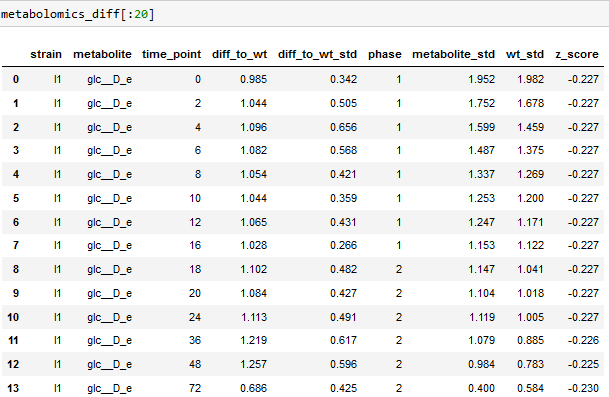

The z-score is added to the table after it is calculated in the method below.

The calculation performed is 

- z = x- mean(p) / std(p)
- mean and std consider differences to WT across all metabolites within a class: 
         (i) intra vs exo; mev-related (dxp vs mev) 
         (ii) non-mev (organic acids vs amino vs other)) across all time points for a given strain
- The populations (p) are different depending on the metabolites
         (i) The extracellular and intracellular are treated separately
         (ii) The mevalonate_mets (mevalonate_mets) and dxp_mets (dxp_mets) are combined to create a unique population
         (iii) The organic acid (organic_acid) metabolites are treated like a unique population
         (iv) The amino acids (amino_acids_all) are treated like a unique population
         (v) If they don't fit into any of the above three categories they are included in a population that includes 
             all the metabolites (either extracelluar or intracellular)
- population mean difference referred to as: mu_p (mean(p)) (p = population)
- population std: std_p (strain vs wt difference for all measurements in a class)
- ex_con = extracellular dmapp/ipdp measurements

In [30]:
# mevalonate_rxns_list = {'Mev-P':'EX_5pmev_e', 'GGPP':'EX_GGDP_e','HMG-coA':'EX_hmgcoa_e', 'hmbdp':'EX_h2mb4p_e', 'Mevalonate':'EX_mev_e', 'Isopentenol':'EX_ipoh_e', 'IP':'EX_ip_e', 'dxyl5p':'EX_dxyl5p_e', 'FPP':'EX_frdp_e', 'GPP':'EX_grdp_e', '2mecdp':'EX_2mecdp_e', '4c2me':'EX_4c2me_e'}
# mevalonate_mets_list = ['grdp_e', 'frdp_e', 'ipdp_e', 'h2mb4p_e', 'dmpp_e', 'atp_e', '5dpmev_c', 'mev_R_c', 'mev_R_e', '5dpmev_e', 'accoa_e', 'hmgcoa_c', 'coa_e', 'dxyl5p_e', 'hmgcoa_e', 'nadh_e', 'ggdp_c', 'lim_e', 'ggdp_e', 'lim_c', '2mecdp_e', 'adp_e', 'aacoa_e', 'ip_e', 'ip_c', 'nadph_e', 'nadp_e', 'ipoh_e', 'bis_c', 'ipoh_c', 'bis_e', '4c2me_e', '5pmev_c', '5pmev_e', 'nad_e']
#dxp_mets = ['dxyl5p_e','dxyl5p_c','h2mb4p_c','h2mb4p_e','2me4p', '2mecdp_c','2mecdp_e', '4c2me_c', '4c2me_e']
#organic_acids = ['ac_e','ac_e','fum_c', 'for_e','glc__D_e', 'glu__L_c','lac__D_c', 'lac__D_e','pyr_c','pyr_e'] +\
#                ['succ_e','succ_c']

def calculate_metabolite_Zscore(df):
    
    read_to_struct = []
    p = ProgressBar(len(df.strain.unique()))
    
    try:
        df = df.drop(['z_score'],axis = 1)
    except:
        pass

    for ind,s in enumerate(df.strain.unique()):
        p.animate(ind+1)
        
        if s != 'DH1':
         
            for t in df[df.strain == s].time_point.unique():
            
                for r in df[(df.strain == s) & (df.time_point == t)].metabolite.unique():
                    tt = 0
                    mu_p_e = 0
                    std_p_e = 0
                    
                # differentiate between extra and intracellular:
                    # is extracellular
                    if '_e' in r or 'ex_con' in r:
                    
                        if r in mevalonate_mets or r in dxp_mets:
                            mu_p_e = df[(pd.notnull(df.diff_to_wt)) & 
                                        (df.strain == s) & (df.metabolite.str.contains('_e')) & 
                                        (df.metabolite.isin(mevalonate_mets+dxp_mets))]['diff_to_wt'].mean()
                            std_p_e = df[(pd.notnull(df.diff_to_wt)) & (df.strain == s) & 
                                         (df.metabolite.str.contains('_e')) & 
                                         (df.metabolite.isin(mevalonate_mets+dxp_mets))]['diff_to_wt'].std()
                        
                        elif r in organic_acids:
                            mu_p_e = df[(pd.notnull(df.diff_to_wt)) & (df.strain == s) & 
                                        (df.metabolite.str.contains('_e')) & 
                                         (df.metabolite.isin(organic_acids))]['diff_to_wt'].mean()
                            std_p_e = df[(pd.notnull(df.diff_to_wt)) & (df.strain == s) & 
                                         (df.metabolite.str.contains('_e')) & 
                                         (df.metabolite.isin(organic_acids))]['diff_to_wt'].std()                        
                        
                        elif r in amino_acids_all:
                            mu_p_e = df[(pd.notnull(df.diff_to_wt)) & (df.strain == s) & 
                                        (df.metabolite.str.contains('_e')) & 
                                        (df.metabolite.isin(amino_acids_all))]['diff_to_wt'].mean()
                            std_p_e = df[(pd.notnull(df.diff_to_wt)) & (df.strain == s) & 
                                         (df.metabolite.str.contains('_e')) & 
                                         (df.metabolite.isin(amino_acids_all))]['diff_to_wt'].std()                       
                                                          
                        else:
                            mu_p_e = df[(pd.notnull(df.diff_to_wt)) & (df.strain == s) & (df.metabolite.str.contains('_e')) & 
                                        (~df.metabolite.isin(mevalonate_mets+dxp_mets)) & 
                                        (~df.metabolite.isin(organic_acids+amino_acids_all))]['diff_to_wt'].mean()
                            std_p_e = df[(pd.notnull(df.diff_to_wt)) & (df.strain == s) & 
                                         (df.metabolite.str.contains('_e')) & 
                                         (~df.metabolite.isin(mevalonate_mets+dxp_mets)) & 
                                         (~df.metabolite.isin(organic_acids+amino_acids_all))]['diff_to_wt'].std()                        
                        
                        tt = df[(pd.notnull(df.diff_to_wt)) & (df.strain == s) & (df.metabolite == r) & 
                                (df.time_point == t)].diff_to_wt.tolist()
                        
                        if len(tt)<1:
                            tmp_z_1 = 0
                            tt = 0
                        else:
                            tt = tt[0]
                            tmp_z_1 = (np.true_divide(tt-mu_p_e,std_p_e))
                    
 
                    # is intracellular     
                    else:
                        mu_p_c = 0
                        std_p_c = 0
                    
                        if r in mevalonate_mets or r in dxp_mets:
                            mu_p_c = df[(pd.notnull(df.diff_to_wt)) & (df.strain == s) & 
                                        (df.metabolite.str.contains('_c')) & 
                                        (df.metabolite.isin(mevalonate_mets+dxp_mets))]['diff_to_wt'].mean()
                            std_p_c = df[(pd.notnull(df.diff_to_wt)) & (df.strain == s) & 
                                         (df.metabolite.str.contains('_c')) & 
                                         (df.metabolite.isin(mevalonate_mets+dxp_mets))]['diff_to_wt'].std()
                    
                    
                        elif r in organic_acids:
                            mu_p_c = df[(pd.notnull(df.diff_to_wt)) & (df.strain == s) & 
                                        (df.metabolite.str.contains('_c')) & 
                                        (df.metabolite.isin(organic_acids))]['diff_to_wt'].mean()
                            std_p_c = df[(pd.notnull(df.diff_to_wt)) & (df.strain == s) & 
                                         (df.metabolite.str.contains('_c')) & 
                                         (df.metabolite.isin(organic_acids))]['diff_to_wt'].std()                     
                    
                    
                        elif r in amino_acids_all:
                            mu_p_c = df[(pd.notnull(df.diff_to_wt)) & (df.strain == s) & 
                                        (df.metabolite.str.contains('_c')) & 
                                        (df.metabolite.isin(amino_acids_all))]['diff_to_wt'].mean()
                            std_p_c = df[(pd.notnull(df.diff_to_wt)) & (df.strain == s) & 
                                         (df.metabolite.str.contains('_c')) & 
                                         (df.metabolite.isin(amino_acids_all))]['diff_to_wt'].std()                    
                    
                        else:
                            mu_p_c =  df[(pd.notnull(df.diff_to_wt)) & (df.strain == s) & 
                                         (df.metabolite.str.contains('_c')) & 
                                         (~df.metabolite.isin(mevalonate_mets+dxp_mets)) & 
                                         (~df.metabolite.isin(organic_acids+amino_acids_all))]['diff_to_wt'].mean()
                            std_p_c = df[(pd.notnull(df.diff_to_wt)) & (df.strain == s) & 
                                         (df.metabolite.str.contains('_c')) & 
                                         (~df.metabolite.isin(mevalonate_mets+dxp_mets)) & 
                                         (~df.metabolite.isin(organic_acids+amino_acids_all))]['diff_to_wt'].std()                        
            
                        tt = df[(pd.notnull(df.diff_to_wt)) & (df.strain == s) & (df.metabolite == r) & 
                                (df.time_point == t)].diff_to_wt.tolist()  

                                        
                        if len(tt)<1:
                            tmp_z_1 = 0
                            tt = 0
                        else:
                            tt = tt[0]
                            tmp_z_1 = (np.true_divide(tt-mu_p_c,std_p_c))
            
                    read_to_struct.append({'strain':s, 'metabolite':r,'z_score':tmp_z_1,'time_point':t})

    df = pd.merge(df, pd.DataFrame(read_to_struct),on=['strain','metabolite','time_point']).drop_duplicates()
    df = df[pd.notnull(df.diff_to_wt)]
    return df

### A function to plot the z-scores

In [31]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np
import matplotlib
import matplotlib.pyplot as plt # Added
import brewer2mpl
import string

def z_score_heat_plot(strain_list,subset_mets,time_point_list, df):
    
    '''
    Example: z_score_heat_plot(strain_list, mets_to_plot, time_point_list, metabolomics_diff)
        where the user can select by most significant z-score:
            metabolomics_diff[(metabolomics_diff.z_score > 1.7) & (metabolomics_diff.z_score < 1.7)]
    
        where:
            strain_list = ['I1','I2','I3','L1','L2','L3','B1','B2']
            mets_to_plot = ['accoa_c','akg_c','acon__C_c','cit_c','icit_c','glx_c','glyclt_c','fdp_c','3pg_c','pep_c','nadp_c','nad_c','amp_c']
            time_point_list = [4,18,48]
    '''

    for tt in time_point_list:
    
        temp_df = df[(df.metabolite.isin(mets_to_plot)) & (df.time_point==tt)]
        
        M = np.array([])
        
        for i in subset_mets:
    
            tmp_list = []
            tmp_strain = temp_df[temp_df.metabolite == i].strain.unique().tolist()
    
            for j in strain_list:
                try:
                    tmp_list.append(np.mean(temp_df[(temp_df.metabolite == i) & 
                                                    (temp_df.strain == j)].diff_to_wt.tolist()))  
                
                except:
                    tmp_list.append(0)
       
                
            if len(M) > 0:
                M = np.vstack((M, tmp_list))
            else:
                M = tmp_list
        
        fig, ax = plt.subplots(figsize=(10,15))
        im = ax.imshow(M, cmap ='Blues')
        
        # Show all ticks and label them with the respective list entries
        ax.set_yticks(np.arange(len(subset_mets)))
        ax.set_xticks(np.arange(len(strain_list)))
        ax.set_yticklabels(subset_mets, fontsize = 16)       
        ax.set_xticklabels(strain_list, fontsize = 16)       
        
        # Loop over data dimensions and create text annotations.
        for i in range(len(subset_mets)):
            for j in range(len(strain_list)):
                text = ax.text(j, i, M[i, j].round(2),
                       ha="center", va="center", color="r", fontsize = 16, fontweight ="bold")
        
        fig.suptitle('Metabolite Z-Scores Changes with Respect to Wild Data', fontweight ="bold", fontsize = 16)
        fig.tight_layout()
        plt.show()

        #name_graph = 'heat_plot_mets_FOLD_diff_wt_strain_all_strains_time_PHASE_%s'%tt
        #fig.savefig('~/%s.svg' %str(name_graph), format='SVG')

### A function to cluster the metabolic shifts

In [32]:
def cluster_metabolite_shifts(df_main):
    ''' code to cluster metabolites based on simple features '''
    
    read_to_struct = []

    for strain in df_main.strain.unique():
        for met in df_main.metabolite.unique():
    
            #df = df_main[df_main.metabolite == met][df_main.strain == strain]
            df = df_main[(df_main.metabolite == met) & (df_main.strain == strain)]

            orig = df.diff_to_wt.tolist()[0]
            std_1 = orig + df.diff_to_wt_std.tolist()[0]
            std_2 = orig - df.diff_to_wt_std.tolist()[0]
    
            # check if met starts at zero
            if min(std_1,std_2) <= 0.0 <= max(std_1,std_2):
                starts_at_zero = True
            else:
                starts_at_zero = False
        
            # check if met ends at zero
            end = df.diff_to_wt.tolist()[-1]
            std_1 = end + df.diff_to_wt_std.tolist()[-1]
            std_2 = end - df.diff_to_wt_std.tolist()[-1]
    
            if min(std_1,std_2) <= 0.0 <= max(std_1,std_2):
                ends_at_zero = True
            else:
                ends_at_zero = False   
        
            #check how many times we leave/return to zero
            leave_zero = 0
            return_to_zero = 0
            count = 0
    
            for t in df.index:
                if count == 0:
                    t_prev_up = np.max([(df.diff_to_wt[t] - df.diff_to_wt_std[t]), (df.diff_to_wt[t] + df.diff_to_wt_std[t])])
                    t_prev_down = np.min([(df.diff_to_wt[t] - df.diff_to_wt_std[t]), (df.diff_to_wt[t] + df.diff_to_wt_std[t])])
                    t_curr_up = np.max([(df.diff_to_wt[t] - df.diff_to_wt_std[t]), (df.diff_to_wt[t] + df.diff_to_wt_std[t])])
                    t_curr_down = np.min([(df.diff_to_wt[t] - df.diff_to_wt_std[t]), (df.diff_to_wt[t] + df.diff_to_wt_std[t])])
                    count +=1
                else:
                    # calculate new time point
                    t_curr_up = np.max([(df.diff_to_wt[t] - df.diff_to_wt_std[t]), (df.diff_to_wt[t] + df.diff_to_wt_std[t])])
                    t_curr_down = np.min([(df.diff_to_wt[t] - df.diff_to_wt_std[t]), (df.diff_to_wt[t] + df.diff_to_wt_std[t])])
            
                    # deviates from zero:
                    # if it was previously zero at time i-1 and now has deviated
                    if t_prev_down <= 0.0 <= t_prev_up:
                        if (t_curr_down > 0.0 and t_curr_up > 0.0) or (t_curr_down < 0.0 and t_curr_up < 0.0):   
                            leave_zero += 1
                
                    else:
                        # return to zero:
                        # if it was previously not at zero at time i-1 and now has returned to zero
                        if t_curr_down <= 0.0 <= t_curr_up:
                            return_to_zero += 1

                    t_prev_up = t_curr_up
                    t_prev_down = t_curr_down
                    count +=1           
                    
            read_to_struct.append({'strain':strain,'metabolite':met,'starts_at_zero':starts_at_zero, 'ends_at_zero':ends_at_zero, 'leave_zero':leave_zero, 'return_to_zero':return_to_zero})
    
    
    DF_MET_clustering = pd.DataFrame(read_to_struct)
    return DF_MET_clustering

### A function to find the shifts in time

In [33]:
def find_shifts_in_time(df, df_omics):    
    ''' script that identifies where shifts occur at specific time points '''
    
    read_to_struct = []
    for r in df.metabolite.unique().tolist():
        for s in df[(DF_MET_clustering.metabolite == r)].strain.unique():

            sig_times = []
            sig_shifts = []
        
            strain_tmp = s 

            df_diff = df_omics[(df_omics.metabolite == r) & (df_omics.strain == strain_tmp)]
            
            tmp_list = df_diff.diff_to_wt.tolist()
    
            for t in df_diff.index:
                t_curr_up = np.max([(df_diff.diff_to_wt[t] - df_diff.diff_to_wt_std[t]), (df_diff.diff_to_wt[t] + df_diff.diff_to_wt_std[t])])
                t_curr_down = np.min([(df_diff.diff_to_wt[t] - df_diff.diff_to_wt_std[t]), (df_diff.diff_to_wt[t] + df_diff.diff_to_wt_std[t])])

                if t_curr_down <= 0.0 <= t_curr_up:
                    pass
                else:
                    sig_times.append(df_diff.time_point[t])
                    sig_shifts.append("%.4f" %np.mean([t_curr_up,t_curr_down]))
    
            read_to_struct.append({ 'metabolite':r, 'strain':strain_tmp, 'significant_shifts':sig_shifts, 'times':sig_times }) 
    
    return(pd.DataFrame(read_to_struct)) 

### A function to plot the profile differences

In [34]:
def plot_dynamic_profile_differences(strain_list, list_mets, df_data):
    '''
    Example: plot_dynamic_profile_differences(strain_list, mets_to_plot)
    
        where:
            strain_list = ['I1','I2','I3','L1','L2','L3','B1','B2']
            mets_to_plot = ['accoa_c','akg_c','acon__C_c','cit_c','icit_c','glx_c','glyclt_c','fdp_c']
    '''
    color_map_dict = {'I1':'black','I2':'black','I3':'black','L1':'black','L2':'black',
                      'L3':'black','B1':'black','B2':'black','DH1':'black'}

    if strain_list == 'all':
        strain_list = ['I1','I2','I3','L1','L2','L3','B1','B2']
    elif strain_list == 'I':
        strain_list = ['I1','I2','I3']
    elif strain_list == 'L':
        strain_list = ['L1','L2','L3']
    elif strain_list == 'B':
        strain_list = ['B1','B2']
    else:
        pass
        
    df_data = df_data.fillna(0) #### Added
    
    for strain in strain_list: 
        fig_len = len(list_mets)*1.1
        num_col = len(list_mets)
        
        fig, axes = plt.subplots(nrows=int(np.round(true_divide(len(list_mets),num_col))), 
                                 ncols=num_col, figsize=(25,fig_len));
        
        nrows = int(np.round(true_divide(len(list_mets),num_col))) # Added
        ncols = num_col # Added
        
        k=0
        af=axes.flatten()       
        for a in af:
            if k < len(list_mets):
                r = list_mets[k]
                
                df = df_data[(df_data.strain == strain) & 
                             (df_data.metabolite == r)].set_index(['time_point'])  ##
                
                
                errors = df.diff_to_wt_std.tolist()[0] 
                if errors < 0.001:
                    errors = df.wt_std.tolist()[0]
                df.diff_to_wt.plot(ax=a, color = color_map_dict[strain],alpha=0.53,legend=False,ls='None', 
                                   marker='o',markersize=10)
                a.errorbar(df.index,df.diff_to_wt, yerr=errors,color = color_map_dict[strain],ls='None', 
                           marker='o',markersize=10)
                a.grid(False);
                k=k+1
            
                a.set_ylabel("diff. (fold)", fontsize=15) 
                a.set_xlabel("time (hr)", fontsize=15)
                a.set_title(r, fontsize=20)
            
            
                for tick in a.xaxis.get_major_ticks():
                    tick.label.set_fontsize(14) 
                for tick in a.yaxis.get_major_ticks():
                    tick.label.set_fontsize(14)
            
                # set limits
                a.set_xlim(2,72)

                max_val = np.max([np.max(df.diff_to_wt.values + max(df.diff_to_wt_std)) , 
                                  min(df.diff_to_wt.values - max(df.diff_to_wt_std))])
                min_val = np.min([np.max(df.diff_to_wt.values + max(df.diff_to_wt_std)) , 
                                  min(df.diff_to_wt.values - max(df.diff_to_wt_std))])
                
                if min_val == max_val:
                    min_val = -0.1
                    max_val = 0.1
                
                
                a.set_ylim(min_val,max_val)
            
                #color based on phase
                a.axvspan(0, 6, alpha=0.2, color=c2)
                a.plot((1,1),(min_val,max_val),'grey',lw=1)
                a.axvspan(6, 20, alpha=0.2, color=c3)
                a.plot((4,4),(min_val,max_val),'grey',lw=1)
                a.axvspan(20, 72, alpha=0.2, color=b3)
                a.plot((2,72),(0,0),'red',lw=1)
        #fig.tight_layout();

# Compute strain differences and store in a pandas dataframe

In [35]:
metabolomics_diff  = create_difference_dataframe(DF_endo_avg_metabolomics_cobra_conc, DF_exo_avg_metabolomics_cobra_conc)
metabolomics_diff[:20]

C:\Users\A00016~1\AppData\Local\Temp\2/ipykernel_12752/1102916789.py:31: RuntimeWarning: divide by zero encountered in double_scalars
  diff = strain_val/wt_val
C:\Users\A00016~1\AppData\Local\Temp\2/ipykernel_12752/1102916789.py:31: RuntimeWarning: invalid value encountered in double_scalars
  diff = strain_val/wt_val
C:\Users\A00016~1\AppData\Local\Temp\2/ipykernel_12752/1102916789.py:31: RuntimeWarning: invalid value encountered in longlong_scalars
  diff = strain_val/wt_val
C:\Users\A00016~1\AppData\Local\Temp\2/ipykernel_12752/1102916789.py:31: RuntimeWarning: invalid value encountered in true_divide
  diff = strain_val/wt_val


strain metabolite  time_point  diff_to_wt  diff_to_wt_std  phase  \
0      I1   glc__D_e           0       0.985           0.342      1   
1      I1   glc__D_e           2       1.044           0.505      1   
2      I1   glc__D_e           4       1.096           0.656      1   
3      I1   glc__D_e           6       1.082           0.568      1   
4      I1   glc__D_e           8       1.054           0.421      1   
5      I1   glc__D_e          10       1.044           0.359      1   
6      I1   glc__D_e          12       1.065           0.431      1   
7      I1   glc__D_e          16       1.028           0.266      1   
8      I1   glc__D_e          18       1.102           0.482      2   
9      I1   glc__D_e          20       1.084           0.427      2   
10     I1   glc__D_e          24       1.113           0.491      2   
11     I1   glc__D_e          36       1.219           0.617      2   
12     I1   glc__D_e          48       1.257           0.596      2   
13     I1   glc__D_e          72       0.686           0.425      2   
14     I1      pyr_e           0       0.381           0.053      1   
15     I1      pyr_e           2       0.020           0.112      1   
16     I1      pyr_e           4       0.009           0.196      1   
17     I1      pyr_e           6       0.030           0.143      1   
18     I1      pyr_e           8       0.484           0.051      1   
19     I1      pyr_e          10       2.894           0.032      1   

    metabolite_std  wt_std  
0            1.952   1.982  
1            1.752   1.678  
2            1.599   1.459  
3            1.487   1.375  
4            1.337   1.269  
5            1.253   1.200  
6            1.247   1.171  
7            1.153   1.122  
8            1.147   1.041  
9            1.104   1.018  
10           1.119   1.005  
11           1.079   0.885  
12           0.984   0.783  
13           0.400   0.584  
14           0.022   0.057  
15           0.002   0.112  
16           0.002   0.196  
17           0.004   0.144  
18           0.028   0.058  
19           0.034   0.012

# Compute the significance perturbation (z score) for a given metabolite, between two conditions

## Group metabolites based on whether they are organic acids, endogenous vs not endogenous

- How significant their differences are will be influenced by these factors, thus they should be grouped together for further assessment

In [36]:
import cobra.test
from cobrapy_bigg_client import client

# create genome-scale model (GEM) for engineered strain
m = cobra.io.load_json_model("iJO1366_mevalonate_pathways.json")

# cluster metabolite and reaction info for analysis of heterologous pathway effects
mevalonate_mets = ['hmgcoa_c','hmgcoa_e','mev_R_e','mev_R_c', '5pmev_c', '5pmev_e','ex_con.id','ipdp_c','ip_e'] +\
                  ['ip_c','frdp_e','frdp_c','grdp_e', 'grdp_c','ggdp_e','ipoh_e','lim_e', 'lim_c', 'bis_e']
subset_mets = ['aacoa_c','accoa_c','akg_c','acon__C_c','cit_c','icit_c','oxalcoa_c','glx_c','glyclt_c','fdp_c'] +\
              ['3pg_c','pep_c','nadp_c','nadp_e','nad_c','nad_e','amp_c','amp_e','adp_c','adp_e','atp_c','atp_e']
organic_acids = ['ac_e','ac_e','fum_c', 'for_e','glc__D_e', 'glu__L_c','lac__D_c', 'lac__D_e','pyr_c','pyr_e'] +\
                ['succ_e','succ_c']
dxp_mets = ['dxyl5p_e','dxyl5p_c','h2mb4p_c','h2mb4p_e','2me4p', '2mecdp_c','2mecdp_e', '4c2me_c', '4c2me_e']
reaction_arr_subset = ['SUCDi','MDH','ICDHyr','FUM','FRD3','CS','AKGDH','ACONTb','ACONTa','FRD2','PDH','GAPD','ENO'] +\
                      ['PGM','PGK','TPI','PYK','GLYAT','GLNS','THRA2','PGL','GND','G6PDH2r','PFK_3','FBA3','RPI'] +\
                      ['TKT1','TKT2','TALA']

# create dataframe to manage subsets
read_to_struct = []
rxn_list = []
ss_list = {}

for r in reaction_arr_subset:
    read_to_struct.append({'rxn':r, 'subsystem':m.reactions.get_by_id(r).subsystem})    
reaction_arr_subset = pd.DataFrame(read_to_struct)

# create groupings by metabolic subsystem
for s in reaction_arr_subset.subsystem.unique():
    rxn_list = rxn_list + [t for t in reaction_arr_subset[reaction_arr_subset.subsystem == s].rxn.tolist()]
    ss_list[s] = [t for t in reaction_arr_subset[reaction_arr_subset.subsystem == s].rxn.tolist()]
    
amino_acids_all = []
for i in metabolomics_diff.metabolite.unique():
    if '__L' in i or 'gly_' in i:
        if 'mal__L_c' not in i and 'glu__L_c' not in i:
            amino_acids_all.append(str(i))

Using license file c:\gurobi910\gurobi.lic
Academic license - for non-commercial use only - expires 2022-11-21


List of the amino acid metabolites

In [37]:
amino_acids_all

['gly_c',
 'ala__L_c',
 'ser__L_c',
 'pro__L_c',
 'val__L_c',
 'thr__L_c',
 'cys__L_c',
 'leu__L_c',
 'ile__L_c',
 'asn__L_c',
 'asp__L_c',
 'gln__L_c',
 'lys__L_c',
 'met__L_c',
 'his__L_c',
 'phe__L_c',
 'arg__L_c',
 'tyr__L_c',
 'trp__L_c']

## Compute Z-scores for each grouping of metabolite for all engineered strains (test vs control)

- z = x- mean(p) / std(p)
- mean and std consider differences to WT across all metabolites within a class: 
         (i) intra vs exo; mev-related (dxp vs mev) 
         (ii) non-mev (organic acids vs amino vs other)) across all time points for a given strain
- population mean difference referred to as: mu_p (mean(p)) (p = population)
- population std: std_p (strain vs wt difference for all measurements in a class)
- ex_con = extracellular dmapp/ipdp measurements

In [38]:
metabolomics_diff[:20]

strain metabolite  time_point  diff_to_wt  diff_to_wt_std  phase  \
0      I1   glc__D_e           0       0.985           0.342      1   
1      I1   glc__D_e           2       1.044           0.505      1   
2      I1   glc__D_e           4       1.096           0.656      1   
3      I1   glc__D_e           6       1.082           0.568      1   
4      I1   glc__D_e           8       1.054           0.421      1   
5      I1   glc__D_e          10       1.044           0.359      1   
6      I1   glc__D_e          12       1.065           0.431      1   
7      I1   glc__D_e          16       1.028           0.266      1   
8      I1   glc__D_e          18       1.102           0.482      2   
9      I1   glc__D_e          20       1.084           0.427      2   
10     I1   glc__D_e          24       1.113           0.491      2   
11     I1   glc__D_e          36       1.219           0.617      2   
12     I1   glc__D_e          48       1.257           0.596      2   
13     I1   glc__D_e          72       0.686           0.425      2   
14     I1      pyr_e           0       0.381           0.053      1   
15     I1      pyr_e           2       0.020           0.112      1   
16     I1      pyr_e           4       0.009           0.196      1   
17     I1      pyr_e           6       0.030           0.143      1   
18     I1      pyr_e           8       0.484           0.051      1   
19     I1      pyr_e          10       2.894           0.032      1   

    metabolite_std  wt_std  
0            1.952   1.982  
1            1.752   1.678  
2            1.599   1.459  
3            1.487   1.375  
4            1.337   1.269  
5            1.253   1.200  
6            1.247   1.171  
7            1.153   1.122  
8            1.147   1.041  
9            1.104   1.018  
10           1.119   1.005  
11           1.079   0.885  
12           0.984   0.783  
13           0.400   0.584  
14           0.022   0.057  
15           0.002   0.112  
16           0.002   0.196  
17           0.004   0.144  
18           0.028   0.058  
19           0.034   0.012

#### Add z-score to "metabolites_diff" dataframe

In [39]:
# note, this takes roughly 5-10 min - note the progress bar below to help track computation

metabolomics_diff = calculate_metabolite_Zscore(metabolomics_diff)
metabolomics_diff[:20]

 [                  0%                  ]
 [********         22%                  ]  2 of 9 complete


C:\Users\A00016~1\AppData\Local\Temp\2/ipykernel_12752/1674763907.py:74: RuntimeWarning: invalid value encountered in true_divide
  tmp_z_1 = (np.true_divide(tt-mu_p_e,std_p_e))


 [*************    33%                  ]  3 of 9 complete
 [*****************44%                  ]  4 of 9 complete
 [*****************56%*                 ]  5 of 9 complete
 [*****************67%*****             ]  6 of 9 complete
 [*****************78%**********        ]  7 of 9 complete
 [*****************89%**************    ]  8 of 9 complete
 [****************100%******************]  9 of 9 complete


strain metabolite  time_point  diff_to_wt  diff_to_wt_std  phase  \
0      I1   glc__D_e           0       0.985           0.342      1   
1      I1   glc__D_e           2       1.044           0.505      1   
2      I1   glc__D_e           4       1.096           0.656      1   
3      I1   glc__D_e           6       1.082           0.568      1   
4      I1   glc__D_e           8       1.054           0.421      1   
5      I1   glc__D_e          10       1.044           0.359      1   
6      I1   glc__D_e          12       1.065           0.431      1   
7      I1   glc__D_e          16       1.028           0.266      1   
8      I1   glc__D_e          18       1.102           0.482      2   
9      I1   glc__D_e          20       1.084           0.427      2   
10     I1   glc__D_e          24       1.113           0.491      2   
11     I1   glc__D_e          36       1.219           0.617      2   
12     I1   glc__D_e          48       1.257           0.596      2   
13     I1   glc__D_e          72       0.686           0.425      2   
14     I1      pyr_e           0       0.381           0.053      1   
15     I1      pyr_e           2       0.020           0.112      1   
16     I1      pyr_e           4       0.009           0.196      1   
17     I1      pyr_e           6       0.030           0.143      1   
18     I1      pyr_e           8       0.484           0.051      1   
19     I1      pyr_e          10       2.894           0.032      1   

    metabolite_std  wt_std  z_score  
0            1.952   1.982   -0.227  
1            1.752   1.678   -0.227  
2            1.599   1.459   -0.227  
3            1.487   1.375   -0.227  
4            1.337   1.269   -0.227  
5            1.253   1.200   -0.227  
6            1.247   1.171   -0.227  
7            1.153   1.122   -0.227  
8            1.147   1.041   -0.227  
9            1.104   1.018   -0.227  
10           1.119   1.005   -0.227  
11           1.079   0.885   -0.226  
12           0.984   0.783   -0.225  
13           0.400   0.584   -0.230  
14           0.022   0.057   -0.232  
15           0.002   0.112   -0.234  
16           0.002   0.196   -0.235  
17           0.004   0.144   -0.234  
18           0.028   0.058   -0.231  
19           0.034   0.012   -0.214

### Notes on what the Z score means:

For differences based on subtraction:
- negative Z score indicates depletion: WT flux > strain flux (strain - WT < 0)
- positive Z score indicates enrichment: WT flux < strain flux (strain - WT > 0)

For differences based on division:
- negative Z score indicates depletion: WT flux > strain flux (strain / WT < 1)
- positive Z score indicates enrichment: WT flux < strain flux (strain / WT > 1)    
    
## Characterize shift mechanisms into six different dynamic profile categories

In this section, we use the above dataframe to compute dynamic difference profiles:
    
    (i) no change
    (ii) constant change
    (iii) deviation
    (iv) return
    (v) shift
    (vi) transient
    
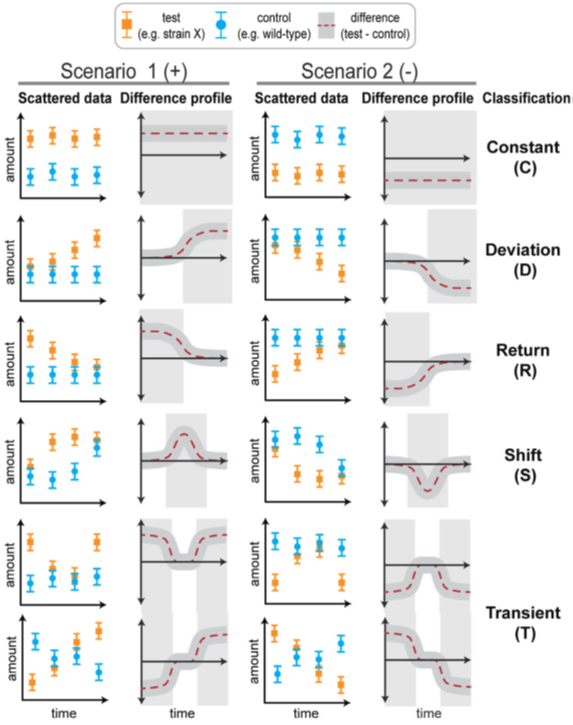

The following is computed for each metabolite per strain:
- number of deviations from 0 (float)
- number of returns to 0 (float)
- start at 0 (True/False)
- end at 0 (True/False)

In [40]:
DF_MET_clustering = cluster_metabolite_shifts(metabolomics_diff)
DF_MET_clustering.head(20)

strain metabolite  starts_at_zero  ends_at_zero  leave_zero  return_to_zero
0      I1   glc__D_e           False         False           0               0
1      I1      pyr_e           False         False           1               1
2      I1     succ_e           False         False           0               0
3      I1   lac__D_e           False         False           0               0
4      I1      for_e           False         False           0               0
5      I1       ac_e           False          True           0               1
6      I1    mev_R_c           False         False           0               0
7      I1    5pmev_c           False         False           0               0
8      I1     ipdp_c           False         False           0               0
9      I1     grdp_c            True          True           1               1
10     I1     frdp_c            True          True           0               0
11     I1      amp_c           False         False           0               0
12     I1      adp_c           False         False           0               0
13     I1      atp_c           False         False           0               0
14     I1      nad_c           False         False           0               0
15     I1     nadp_c           False         False           0               0
16     I1    accoa_c           False         False           0               0
17     I1      fdp_c           False         False           0               0
18     I1      3pg_c           False          True           0               1
19     I1      pep_c           False         False           0               0

## Profile 1: "No change"

In [41]:
df = DF_MET_clustering[(DF_MET_clustering.ends_at_zero == True) & (DF_MET_clustering.starts_at_zero == True) & 
                       (DF_MET_clustering.leave_zero == 0) & (DF_MET_clustering.return_to_zero == 0)]

print("Non-changing metabolites:", df.metabolite.unique().tolist())
df.set_index(['strain','metabolite']).head(30)

Non-changing metabolites: ['frdp_c', 'asp__L_c', 'dxyl5p_e', 'ac_e', 'coa_e', 'accoa_e', 'amp_e']


starts_at_zero  ends_at_zero  leave_zero  return_to_zero
strain metabolite                                                          
I1     frdp_c                True          True           0               0
       asp__L_c              True          True           0               0
       dxyl5p_e              True          True           0               0
I2     ac_e                  True          True           0               0
       frdp_c                True          True           0               0
       dxyl5p_e              True          True           0               0
       coa_e                 True          True           0               0
       accoa_e               True          True           0               0
       amp_e                 True          True           0               0
I3     asp__L_c              True          True           0               0
       dxyl5p_e              True          True           0               0
       amp_e                 True          True           0               0
L1     coa_e                 True          True           0               0
L3     coa_e                 True          True           0               0
B2     dxyl5p_e              True          True           0               0

## Profile 2: "Constant change"

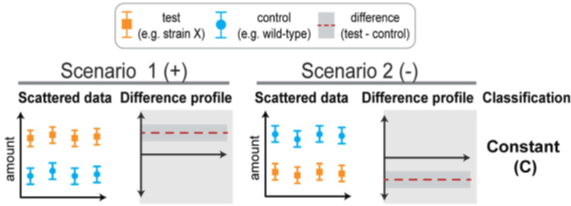

In [42]:
df = DF_MET_clustering[(DF_MET_clustering.ends_at_zero == False) & (DF_MET_clustering.starts_at_zero == False) 
                       & (DF_MET_clustering.leave_zero == 0) & (DF_MET_clustering.return_to_zero == 0)]

print("Constant changing metabolites:", df.metabolite.unique().tolist())
df.set_index(['strain','metabolite']).head(30)

Constant changing metabolites: ['glc__D_e', 'succ_e', 'lac__D_e', 'for_e', 'mev_R_c', '5pmev_c', 'ipdp_c', 'amp_c', 'adp_c', 'atp_c', 'nad_c', 'nadp_c', 'accoa_c', 'fdp_c', 'pep_c', 'pyr_c', 'lac__D_c', 'fum_c', 'succ_c', 'mal__L_c', 'acon__C_c', 'cit_c', 'glx_c', 'glyclt_c', 'gly_c', 'ala__L_c', 'ser__L_c', 'pro__L_c', 'val__L_c', 'leu__L_c', 'ile__L_c', 'asn__L_c', 'gln__L_c', 'met__L_c', 'his__L_c', 'phe__L_c', 'arg__L_c', 'tyr__L_c', 'trp__L_c', '3pg_c', 'akg_c', '2mecdp_c', 'asp__L_c', 'lys__L_c', 'hmgcoa_e', 'icit_c', 'dxyl5p_c', 'glu__L_c', '4c2me_e', 'pyr_e', 'ac_e', 'grdp_c', 'frdp_c', 'thr__L_c', 'amp_e']


starts_at_zero  ends_at_zero  leave_zero  return_to_zero
strain metabolite                                                          
I1     glc__D_e             False         False           0               0
       succ_e               False         False           0               0
       lac__D_e             False         False           0               0
       for_e                False         False           0               0
       mev_R_c              False         False           0               0
       5pmev_c              False         False           0               0
       ipdp_c               False         False           0               0
       amp_c                False         False           0               0
       adp_c                False         False           0               0
       atp_c                False         False           0               0
       nad_c                False         False           0               0
       nadp_c               False         False           0               0
       accoa_c              False         False           0               0
       fdp_c                False         False           0               0
       pep_c                False         False           0               0
       pyr_c                False         False           0               0
       lac__D_c             False         False           0               0
       fum_c                False         False           0               0
       succ_c               False         False           0               0
       mal__L_c             False         False           0               0
       acon__C_c            False         False           0               0
       cit_c                False         False           0               0
       glx_c                False         False           0               0
       glyclt_c             False         False           0               0
       gly_c                False         False           0               0
       ala__L_c             False         False           0               0
       ser__L_c             False         False           0               0
       pro__L_c             False         False           0               0
       val__L_c             False         False           0               0
       leu__L_c             False         False           0               0

When do these shifts occur? (since they are constant- all time points)

In [43]:
df_omics = metabolomics_diff
find_shifts_in_time(df, df_omics).set_index(['strain','metabolite']).head(30)

C:\Users\A00016~1\AppData\Local\Temp\2/ipykernel_12752/1013023464.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for s in df[(DF_MET_clustering.metabolite == r)].strain.unique():


significant_shifts  \
strain metabolite                                                      
I1     glc__D_e    [0.9850, 1.0443, 1.0965, 1.0819, 1.0536, 1.043...   
L1     glc__D_e    [0.9944, 1.0330, 1.0688, 1.0420, 1.0473, 1.006...   
L2     glc__D_e    [0.9729, 1.0640, 1.1479, 1.1716, 1.1938, 1.181...   
B1     glc__D_e    [0.9878, 1.0199, 1.0361, 0.9980, 0.9822, 0.951...   
B2     glc__D_e    [0.9894, 0.9857, 1.0209, 1.0074, 0.9856, 0.951...   
I1     succ_e      [1.0962, 0.9661, 0.8954, 0.8201, 0.8811, 0.896...   
I2     succ_e      [0.9376, 0.9842, 0.9422, 0.8550, 0.8749, 0.901...   
I3     succ_e      [1.4823, 0.9879, 0.9288, 0.8569, 0.9133, 0.955...   
L1     succ_e      [2.1073, 1.0216, 0.9273, 0.8643, 0.8859, 0.879...   
L2     succ_e      [1.5606, 0.2672, 0.2817, 0.1931, 0.1896, 0.159...   
L3     succ_e      [2.8586, 0.2330, 0.2027, 0.2002, 0.2137, 0.214...   
B1     succ_e      [2.3513, 1.0457, 0.9809, 0.9502, 0.9895, 0.986...   
B2     succ_e      [1.7352, 0.9578, 0.9205, 0.8578, 0.8502, 0.959...   
I1     lac__D_e    [0.8415, 3.3302, 3.7345, 3.0410, 6.0146, 8.834...   
I2     lac__D_e    [1.0204, 1.8897, 1.9526, 1.1879, 1.9697, 2.929...   
I3     lac__D_e    [1.0451, 0.7660, 0.7037, 0.3097, 0.4584, 0.736...   
L1     lac__D_e    [0.9761, 1.2007, 1.2180, 1.1479, 1.3561, 1.253...   
L2     lac__D_e    [2.2444, 2.0811, 1.5971, 0.9689, 1.4851, 2.364...   
L3     lac__D_e    [1.8260, 0.8798, 0.8290, 0.6113, 0.9777, 1.592...   
B1     lac__D_e    [1.0598, 1.2002, 1.2757, 1.1758, 1.2052, 1.322...   
B2     lac__D_e    [1.1926, 0.9538, 0.8360, 0.6899, 1.1171, 1.700...   
I1     for_e       [0.5467, 1.6381, 0.8996, 0.9169, 1.0385, 1.326...   
I2     for_e       [0.3007, 1.3750, 0.7489, 0.7588, 0.8938, 1.241...   
I3     for_e       [0.6831, 0.9709, 1.4143, 1.4045, 1.7038, 2.109...   
L1     for_e       [0.8323, 0.8969, 1.1964, 1.1234, 2.0742, 1.483...   
L2     for_e       [0.4105, 0.6987, 0.8147, 0.6386, 0.6605, 0.731...   
L3     for_e       [1.0421, 0.7790, 1.1515, 1.3203, 1.5549, 1.849...   
B1     for_e       [1.1219, 1.3005, 1.8615, 1.5634, 1.6590, 2.004...   
B2     for_e       [0.8616, 1.0149, 1.5489, 1.3936, 3.2770, 1.760...   
I1     mev_R_c     [0.1108, 11.1025, 14.6949, 27.3836, 9.4039, 7....   

                                                               times  
strain metabolite                                                     
I1     glc__D_e    [0, 2, 4, 6, 8, 10, 12, 16, 18, 20, 24, 36, 48...  
L1     glc__D_e    [0, 2, 4, 6, 8, 10, 12, 16, 18, 20, 24, 36, 48...  
L2     glc__D_e    [0, 2, 4, 6, 8, 10, 12, 16, 18, 20, 24, 36, 48...  
B1     glc__D_e    [0, 2, 4, 6, 8, 10, 12, 16, 18, 20, 24, 36, 48...  
B2     glc__D_e    [0, 2, 4, 6, 8, 10, 12, 16, 18, 20, 24, 36, 48...  
I1     succ_e      [0, 2, 4, 6, 8, 10, 12, 16, 18, 20, 24, 36, 48...  
I2     succ_e      [0, 2, 4, 6, 8, 10, 12, 16, 18, 20, 24, 36, 48...  
I3     succ_e      [0, 2, 4, 6, 8, 10, 12, 16, 18, 20, 24, 36, 48...  
L1     succ_e      [0, 2, 4, 6, 8, 10, 12, 16, 18, 20, 24, 36, 48...  
L2     succ_e      [0, 2, 4, 6, 8, 10, 12, 16, 18, 20, 24, 36, 48...  
L3     succ_e      [0, 2, 4, 6, 8, 10, 12, 16, 18, 20, 24, 36, 48...  
B1     succ_e      [0, 2, 4, 6, 8, 10, 12, 16, 18, 20, 24, 36, 48...  
B2     succ_e      [0, 2, 4, 6, 8, 10, 12, 16, 18, 20, 24, 36, 48...  
I1     lac__D_e              [0, 2, 4, 6, 8, 10, 12, 16, 18, 48, 72]  
I2     lac__D_e              [0, 2, 4, 6, 8, 10, 12, 16, 18, 48, 72]  
I3     lac__D_e              [0, 2, 4, 6, 8, 10, 12, 16, 18, 48, 72]  
L1     lac__D_e              [0, 2, 4, 6, 8, 10, 12, 16, 18, 48, 72]  
L2     lac__D_e              [0, 2, 4, 6, 8, 10, 12, 16, 18, 48, 72]  
L3     lac__D_e              [0, 2, 4, 6, 8, 10, 12, 16, 18, 48, 72]  
B1     lac__D_e              [0, 2, 4, 6, 8, 10, 12, 16, 18, 48, 72]  
B2     lac__D_e              [0, 2, 4, 6, 8, 10, 12, 16, 18, 48, 72]  
I1     for_e       [0, 2, 4, 6, 8, 10, 12, 16, 18, 20, 24, 36, 48...  
I2     for_e       [0, 2, 4, 6, 8, 10, 12

## Profile 3: "Deviation"

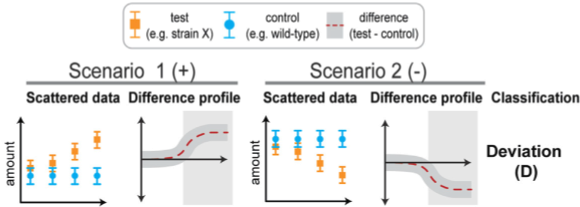

In [44]:
df = DF_MET_clustering[(DF_MET_clustering.ends_at_zero == False) & (DF_MET_clustering.starts_at_zero == True) & 
                       (DF_MET_clustering.leave_zero == 1) & (DF_MET_clustering.return_to_zero == 0)]

df.set_index(['strain','metabolite']).head(30)

starts_at_zero  ends_at_zero  leave_zero  return_to_zero
strain metabolite                                                          
I1     4c2me_e               True         False           1               0
       accoa_e               True         False           1               0
       hmgcoa_e              True         False           1               0
       amp_e                 True         False           1               0
I2     icit_c                True         False           1               0
       4c2me_e               True         False           1               0
L1     2mecdp_c              True         False           1               0
       accoa_e               True         False           1               0
       amp_e                 True         False           1               0
L2     icit_c                True         False           1               0
       dxyl5p_e              True         False           1               0
       amp_e                 True         False           1               0
L3     accoa_e               True         False           1               0
B1     2mecdp_c              True         False           1               0
       4c2me_e               True         False           1               0
       coa_e                 True         False           1               0
       accoa_e               True         False           1               0
B2     grdp_c                True         False           1               0
       4c2me_e               True         False           1               0
       accoa_e               True         False           1               0

When do these shifts occur?

In [45]:
df_omics = metabolomics_diff
find_shifts_in_time(df, df_omics).set_index(['strain','metabolite']).head(30)

C:\Users\A00016~1\AppData\Local\Temp\2/ipykernel_12752/1013023464.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for s in df[(DF_MET_clustering.metabolite == r)].strain.unique():


significant_shifts  \
strain metabolite                                                      
I1     4c2me_e     [0.1168, 0.2495, 0.3698, 0.3278, 0.6133, 0.664...   
I2     4c2me_e     [0.0974, 0.1997, 0.1514, 0.2508, 0.4251, 0.482...   
B1     4c2me_e     [0.0644, 0.1051, 0.1028, 0.0638, 0.0522, 0.023...   
B2     4c2me_e     [0.0904, 0.0511, 0.0469, 0.0754, 0.0693, 0.109...   
I1     accoa_e      [0.4414, 0.2039, 0.2086, 0.2390, 0.2656, 0.2612]   
L1     accoa_e      [0.5861, 0.3627, 0.8323, 1.0767, 0.9130, 1.0909]   
L3     accoa_e      [0.5565, 0.5875, 0.4324, 0.4342, 0.5076, 0.4884]   
B1     accoa_e      [0.4726, 0.7045, 0.7093, 0.9986, 0.4596, 0.9261]   
B2     accoa_e                      [0.4737, 0.6667, 0.5516, 0.6256]   
I1     hmgcoa_e     [1.0557, 1.2728, 0.8653, 1.2029, 1.1729, 1.1246]   
       amp_e                                                [0.2281]   
L1     amp_e                        [0.9658, 1.6666, 1.1974, 0.8394]   
L2     amp_e                        [1.5299, 2.1754, 2.8114, 0.7439]   
I2     icit_c               [0.1000, 0.5360, 0.4470, 0.5854, 0.8221]   
L2     icit_c                                       [0.0296, 0.3755]   
L1     2mecdp_c    [0.9275, 1.0828, 1.0244, 0.5536, 0.5835, 0.423...   
B1     2mecdp_c    [2.1693, 0.8154, 1.0024, 0.6473, 0.7012, 0.622...   
L2     dxyl5p_e                             [0.3792, 0.5864, 0.5468]   
B1     coa_e                                                [0.0559]   
B2     grdp_c                      [8.4973, 10.0773, 9.2771, 2.3936]   

                                                           times  
strain metabolite                                                 
I1     4c2me_e     [4, 6, 8, 10, 12, 16, 18, 20, 24, 36, 48, 72]  
I2     4c2me_e     [4, 6, 8, 10, 12, 16, 18, 20, 24, 36, 48, 72]  
B1     4c2me_e                      [16, 18, 20, 24, 36, 48, 72]  
B2     4c2me_e        [6, 8, 10, 12, 16, 18, 20, 24, 36, 48, 72]  
I1     accoa_e                           [4, 12, 18, 24, 48, 72]  
L1     accoa_e                           [4, 12, 18, 24, 48, 72]  
L3     accoa_e                           [4, 12, 18, 24, 48, 72]  
B1     accoa_e                           [4, 12, 18, 24, 48, 72]  
B2     accoa_e                                  [18, 24, 48, 72]  
I1     hmgcoa_e                          [4, 12, 18, 24, 48, 72]  
       amp_e                                                [72]  
L1     amp_e                                    [18, 24, 48, 72]  
L2     amp_e                                    [18, 24, 48, 72]  
I2     icit_c                                [8, 12, 18, 24, 48]  
L2     icit_c                                           [24, 48]  
L1     2mecdp_c                   [4, 8, 12, 18, 24, 36, 48, 72]  
B1     2mecdp_c                   [4, 8, 12, 18, 24, 36, 48, 72]  
L2     dxyl5p_e                                     [36, 48, 72]  
B1     coa_e                                                [72]  
B2     grdp_c                                   [12, 18, 24, 48]

## Profile 4: "Return"

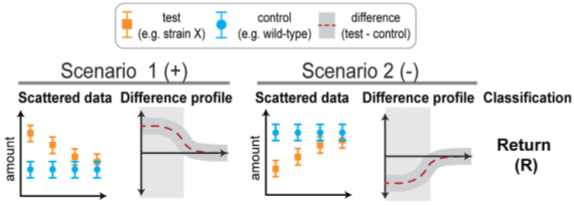

In [46]:
DF_MET_clustering[(DF_MET_clustering.ends_at_zero == True) & 
                  (DF_MET_clustering.starts_at_zero == False) & (DF_MET_clustering.leave_zero == 0) & 
                  (DF_MET_clustering.return_to_zero == 1)]

strain metabolite  starts_at_zero  ends_at_zero  leave_zero  \
5       I1       ac_e           False          True           0   
18      I1      3pg_c           False          True           0   
25      I1      akg_c           False          True           0   
28      I1     icit_c           False          True           0   
31      I1   dxyl5p_c           False          True           0   
32      I1   2mecdp_c           False          True           0   
33      I1    4c2me_c           False          True           0   
39      I1   thr__L_c           False          True           0   
45      I1   lys__L_c           False          True           0   
46      I1   glu__L_c           False          True           0   
55      I1      coa_e           False          True           0   
90      I2   dxyl5p_c           False          True           0   
92      I2    4c2me_c           False          True           0   
105     I2   glu__L_c           False          True           0   
118     I3   glc__D_e           False          True           0   
123     I3       ac_e           False          True           0   
136     I3      3pg_c           False          True           0   
151     I3    4c2me_c           False          True           0   
157     I3   thr__L_c           False          True           0   
159     I3   ile__L_c           False          True           0   
173     I3      coa_e           False          True           0   
210     L1    4c2me_c           False          True           0   
223     L1   glu__L_c           False          True           0   
241     L2       ac_e           False          True           0   
254     L2      3pg_c           False          True           0   
269     L2    4c2me_c           False          True           0   
275     L2   thr__L_c           False          True           0   
277     L2   ile__L_c           False          True           0   
282     L2   glu__L_c           False          True           0   
295     L3   glc__D_e           False          True           0   
300     L3       ac_e           False          True           0   
304     L3     grdp_c           False          True           0   
305     L3     frdp_c           False          True           0   
320     L3      akg_c           False          True           0   
336     L3   ile__L_c           False          True           0   
341     L3   glu__L_c           False          True           0   
379     B1      akg_c           False          True           0   
385     B1   dxyl5p_c           False          True           0   
387     B1    4c2me_c           False          True           0   
400     B1   glu__L_c           False          True           0   
418     B2       ac_e           False          True           0   
431     B2      3pg_c           False          True           0   
441     B2     icit_c           False          True           0   
444     B2   dxyl5p_c           False          True           0   
446     B2    4c2me_c           False          True           0   
459     B2   glu__L_c           False          True           0   
468     B2      coa_e           False          True           0   

     return_to_zero  
5                 1  
18                1  
25                1  
28                1  
31                1  
32                1  
33                1  
39                1  
45                1  
46                1  
55                1  
90                1  
92                1  
105               1  
118               1  
123               1  
136               1  
151               1  
157               1  
159               1  
173               1  
210               1  
223               1  
241               1  
254               1  
269               1  
275               1  
277               1  
282               1  
295               1  
300               1  
304               1  
305               1  
320               1  
336              

## Profile 5: "Shift"

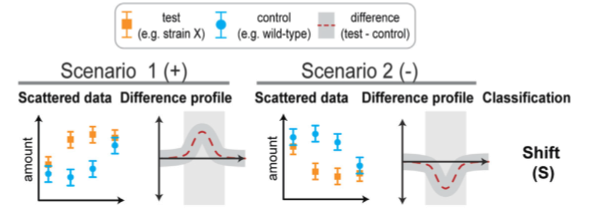

In [47]:
DF_MET_clustering[(DF_MET_clustering.ends_at_zero == True) & (DF_MET_clustering.starts_at_zero == True) & 
                  (DF_MET_clustering.leave_zero == 1) & (DF_MET_clustering.return_to_zero == 1)]

strain metabolite  starts_at_zero  ends_at_zero  leave_zero  \
9       I1     grdp_c            True          True           1   
68      I2     grdp_c            True          True           1   
127     I3     grdp_c            True          True           1   
128     I3     frdp_c            True          True           1   
291     L2      coa_e            True          True           1   
328     L3    4c2me_c            True          True           1   
363     B1     grdp_c            True          True           1   
445     B2   2mecdp_c            True          True           1   

     return_to_zero  
9                 1  
68                1  
127               1  
128               1  
291               1  
328               1  
363               1  
445               1

## Profile 6: "Transient"

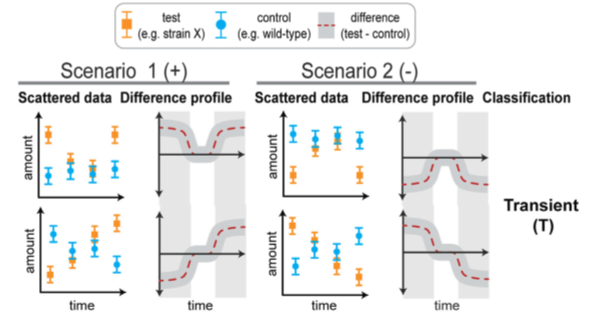

In [48]:
DF_MET_clustering[(DF_MET_clustering.ends_at_zero == False) & (DF_MET_clustering.starts_at_zero == False) & 
                  (DF_MET_clustering.leave_zero > 1) & (DF_MET_clustering.return_to_zero > 1)]

strain metabolite  starts_at_zero  ends_at_zero  leave_zero  \
237     L2      pyr_e           False         False           2   
296     L3      pyr_e           False         False           2   

     return_to_zero  
237               2  
296               2

# Visualization

### Plot raw metabolite concentrations over time, loops over all strains, takes error estimates from previous step

In [49]:
metabolomics_diff[:20]

strain metabolite  time_point  diff_to_wt  diff_to_wt_std  phase  \
0      I1   glc__D_e           0       0.985           0.342      1   
1      I1   glc__D_e           2       1.044           0.505      1   
2      I1   glc__D_e           4       1.096           0.656      1   
3      I1   glc__D_e           6       1.082           0.568      1   
4      I1   glc__D_e           8       1.054           0.421      1   
5      I1   glc__D_e          10       1.044           0.359      1   
6      I1   glc__D_e          12       1.065           0.431      1   
7      I1   glc__D_e          16       1.028           0.266      1   
8      I1   glc__D_e          18       1.102           0.482      2   
9      I1   glc__D_e          20       1.084           0.427      2   
10     I1   glc__D_e          24       1.113           0.491      2   
11     I1   glc__D_e          36       1.219           0.617      2   
12     I1   glc__D_e          48       1.257           0.596      2   
13     I1   glc__D_e          72       0.686           0.425      2   
14     I1      pyr_e           0       0.381           0.053      1   
15     I1      pyr_e           2       0.020           0.112      1   
16     I1      pyr_e           4       0.009           0.196      1   
17     I1      pyr_e           6       0.030           0.143      1   
18     I1      pyr_e           8       0.484           0.051      1   
19     I1      pyr_e          10       2.894           0.032      1   

    metabolite_std  wt_std  z_score  
0            1.952   1.982   -0.227  
1            1.752   1.678   -0.227  
2            1.599   1.459   -0.227  
3            1.487   1.375   -0.227  
4            1.337   1.269   -0.227  
5            1.253   1.200   -0.227  
6            1.247   1.171   -0.227  
7            1.153   1.122   -0.227  
8            1.147   1.041   -0.227  
9            1.104   1.018   -0.227  
10           1.119   1.005   -0.227  
11           1.079   0.885   -0.226  
12           0.984   0.783   -0.225  
13           0.400   0.584   -0.230  
14           0.022   0.057   -0.232  
15           0.002   0.112   -0.234  
16           0.002   0.196   -0.235  
17           0.004   0.144   -0.234  
18           0.028   0.058   -0.231  
19           0.034   0.012   -0.214

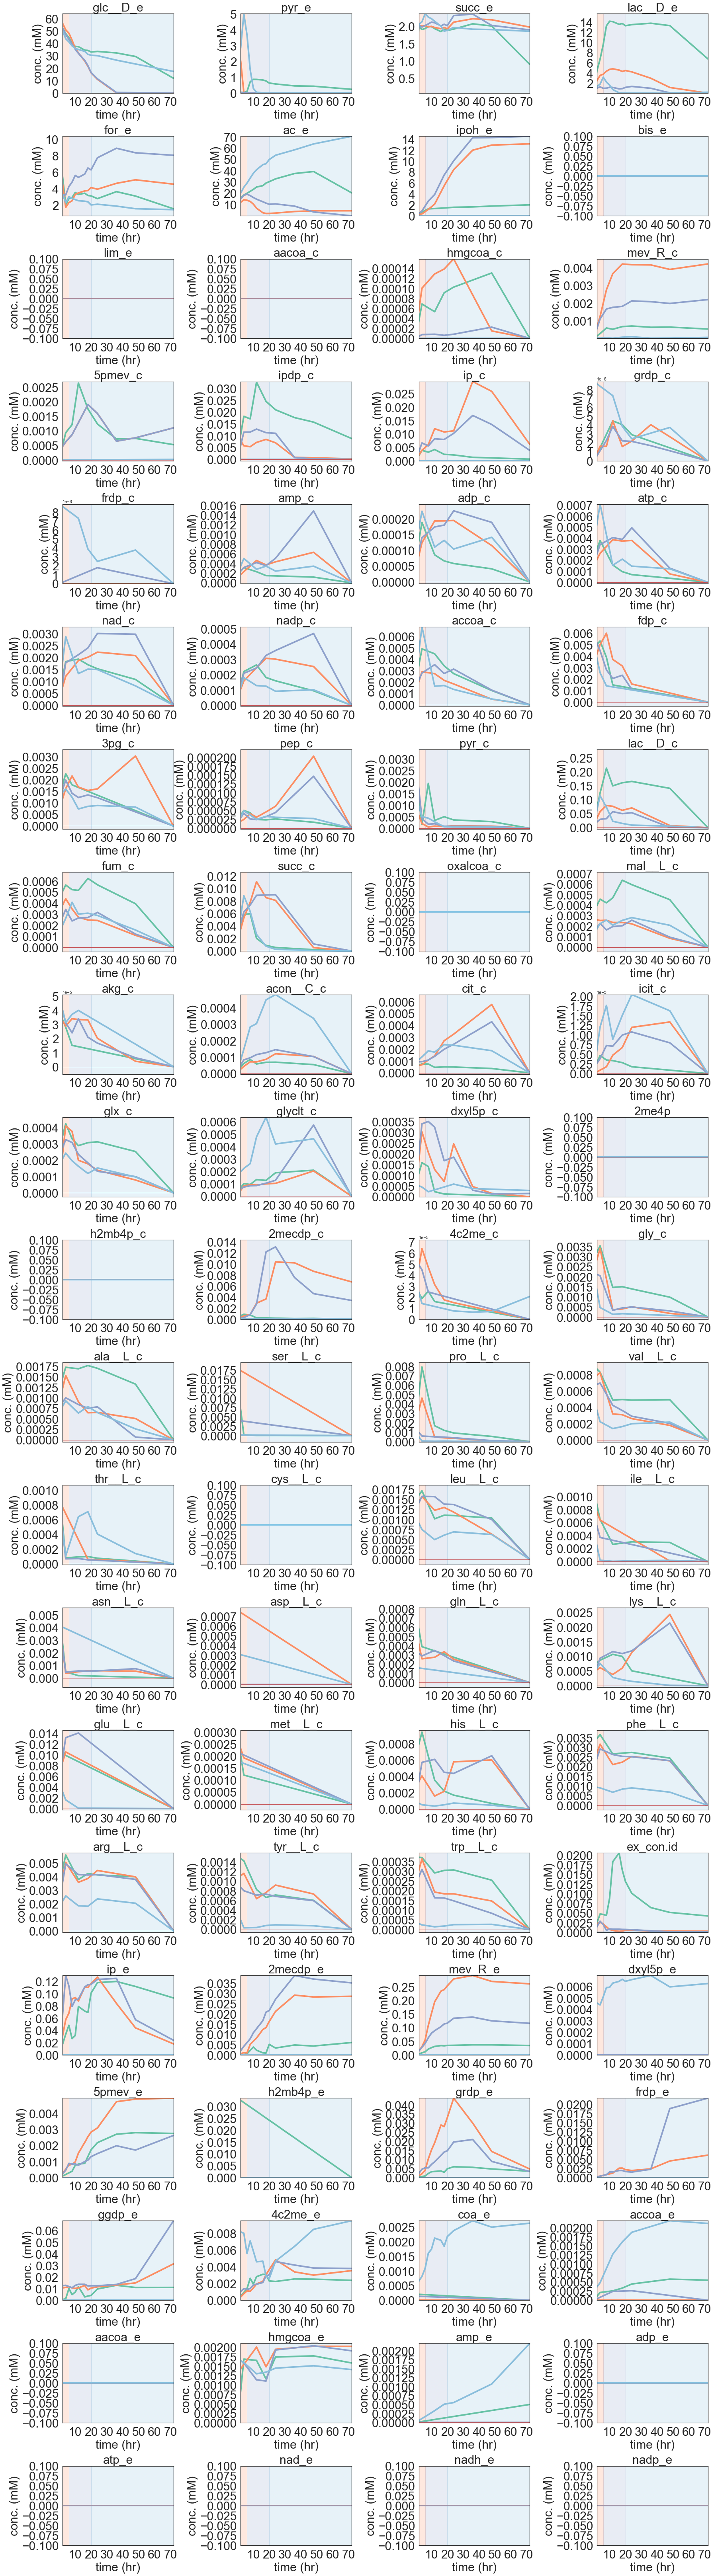

In [50]:
from numpy import true_divide

plot_raw_strain_data('I',['I1','I2','I3','DH1'], metabolomics_diff);

### Plot heat map showing the significant changing metabolites per time point (hour = 4), for all strains

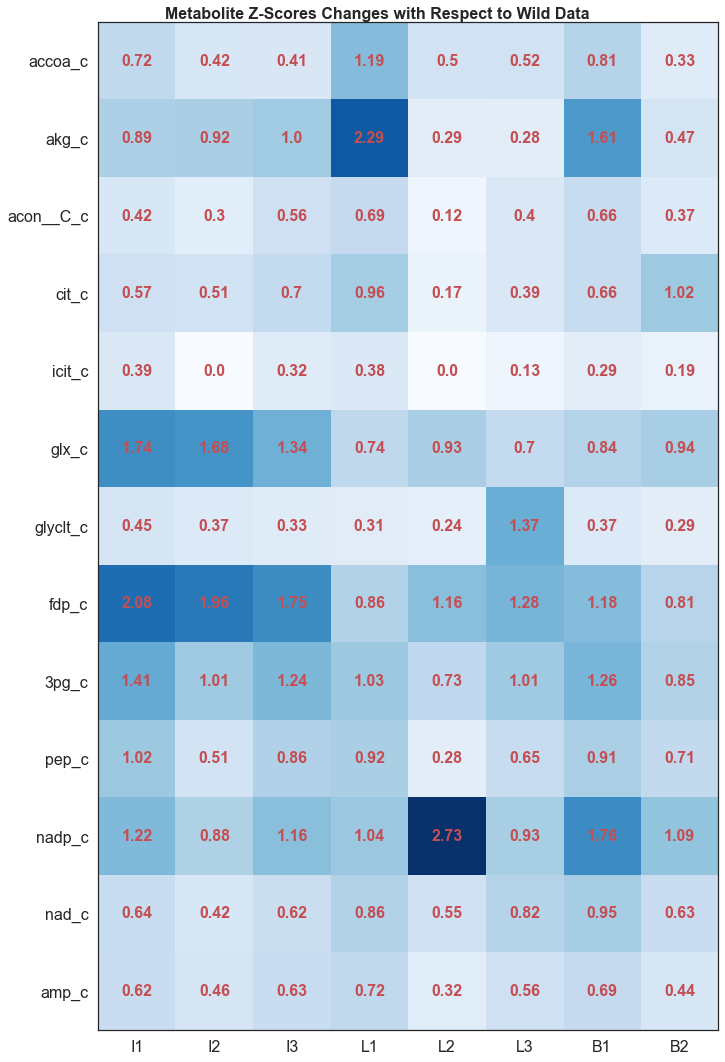

C:\Users\a00016187\Anaconda3\envs\Combined\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\a00016187\Anaconda3\envs\Combined\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


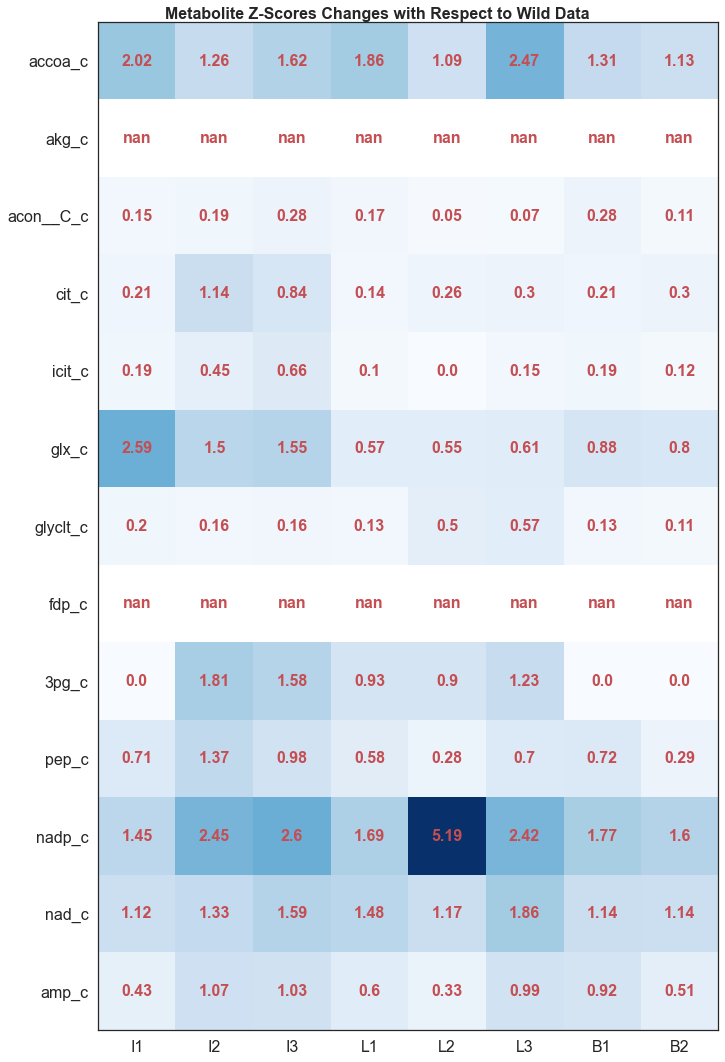

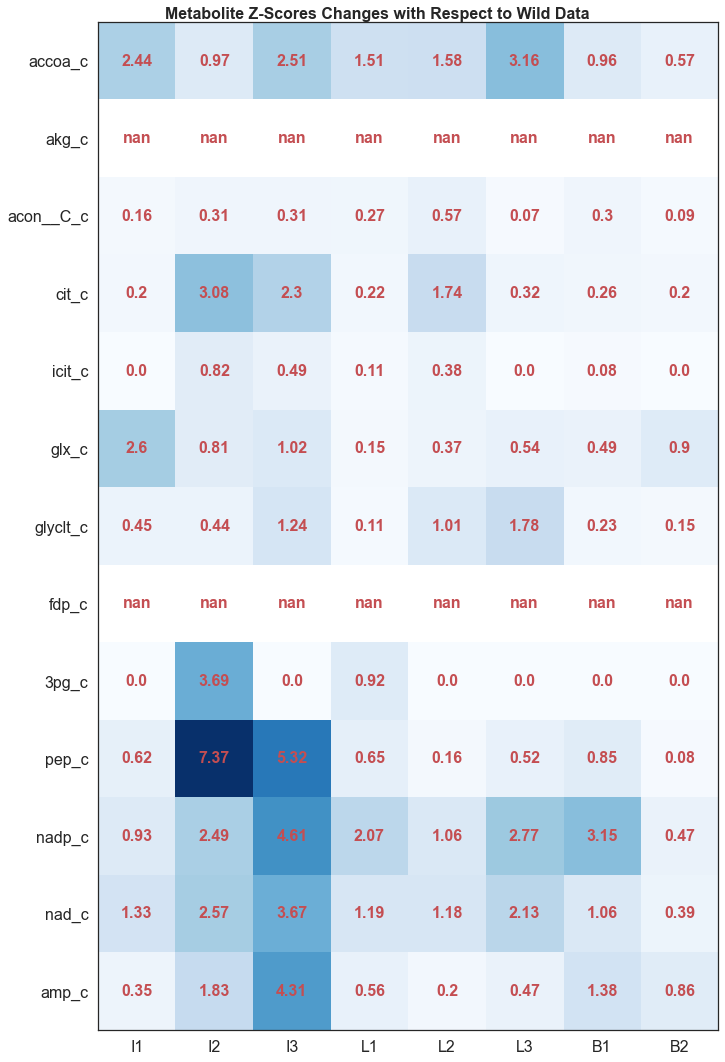

In [51]:
strain_list = ['I1','I2','I3','L1','L2','L3','B1','B2']
mets_to_plot = ['accoa_c','akg_c','acon__C_c','cit_c','icit_c','glx_c','glyclt_c','fdp_c','3pg_c','pep_c',
                'nadp_c','nad_c','amp_c']
time_list = [4,18,48] # Available time = [0, 2, 4, 6, 8, 10, 12, 16, 18, 20, 24, 36, 48, 72]

z_score_heat_plot(strain_list, mets_to_plot, time_list, metabolomics_diff)

## Plot dynamic difference profiles between a strain and WT metabolite

### Deviations profile
The rows are selected as "all" which means 'I1','I2','I3','L1','L2','L3','B1',and 'B2'in order. Plotting the reactions associated with the "Deviation difference profile."

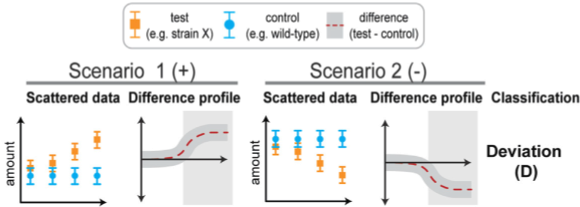

### The list of metabolites with the "Deviations" profile

In [52]:
DF_MET_clustering[(DF_MET_clustering.ends_at_zero == False) & (DF_MET_clustering.starts_at_zero == True) 
                       & (DF_MET_clustering.leave_zero == True) & (DF_MET_clustering.return_to_zero == False)]

strain metabolite  starts_at_zero  ends_at_zero  leave_zero  \
54      I1    4c2me_e            True         False           1   
56      I1    accoa_e            True         False           1   
57      I1   hmgcoa_e            True         False           1   
58      I1      amp_e            True         False           1   
87      I2     icit_c            True         False           1   
113     I2    4c2me_e            True         False           1   
209     L1   2mecdp_c            True         False           1   
233     L1    accoa_e            True         False           1   
235     L1      amp_e            True         False           1   
264     L2     icit_c            True         False           1   
289     L2   dxyl5p_e            True         False           1   
294     L2      amp_e            True         False           1   
351     L3    accoa_e            True         False           1   
386     B1   2mecdp_c            True         False           1   
408     B1    4c2me_e            True         False           1   
409     B1      coa_e            True         False           1   
410     B1    accoa_e            True         False           1   
422     B2     grdp_c            True         False           1   
467     B2    4c2me_e            True         False           1   
469     B2    accoa_e            True         False           1   

     return_to_zero  
54                0  
56                0  
57                0  
58                0  
87                0  
113               0  
209               0  
233               0  
235               0  
264               0  
289               0  
294               0  
351               0  
386               0  
408               0  
409               0  
410               0  
422               0  
467               0  
469               0

### Plot the data for the "Deviations" profile

C:\Users\A00016~1\AppData\Local\Temp\2/ipykernel_12752/1013023464.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for s in df[(DF_MET_clustering.metabolite == r)].strain.unique():


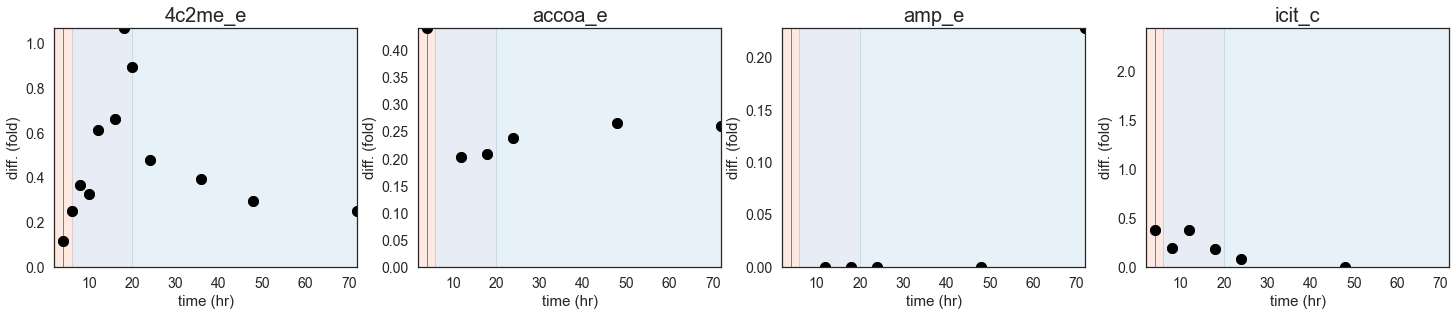

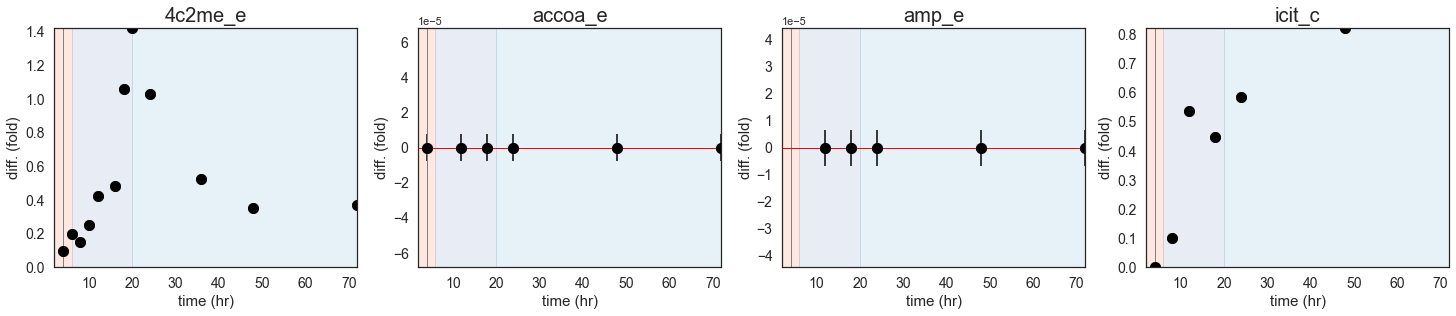

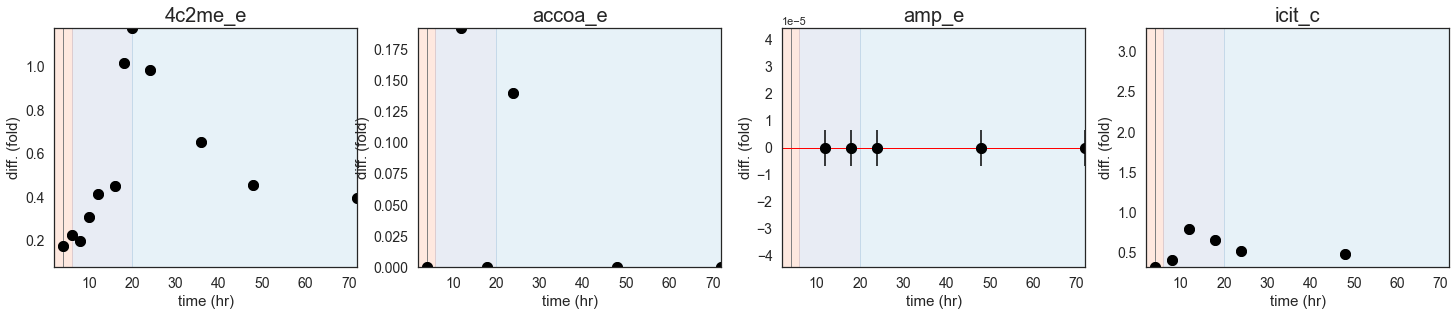

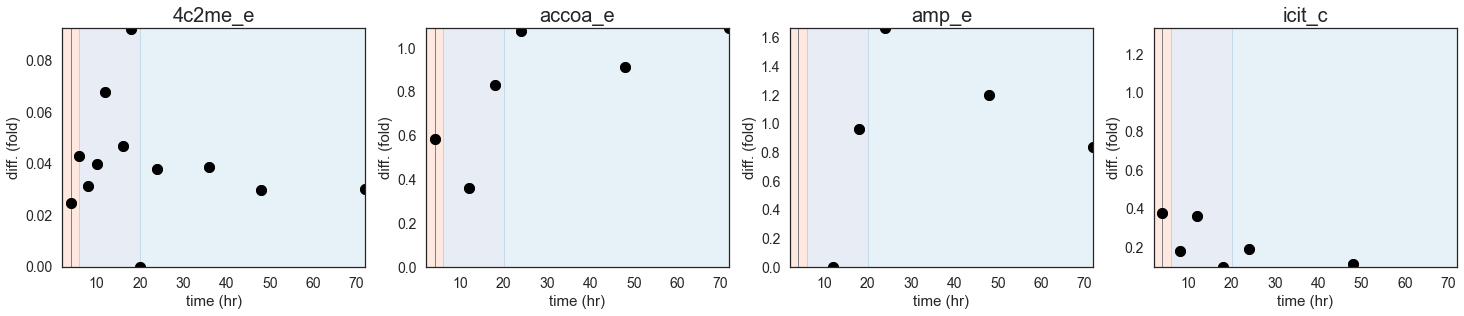

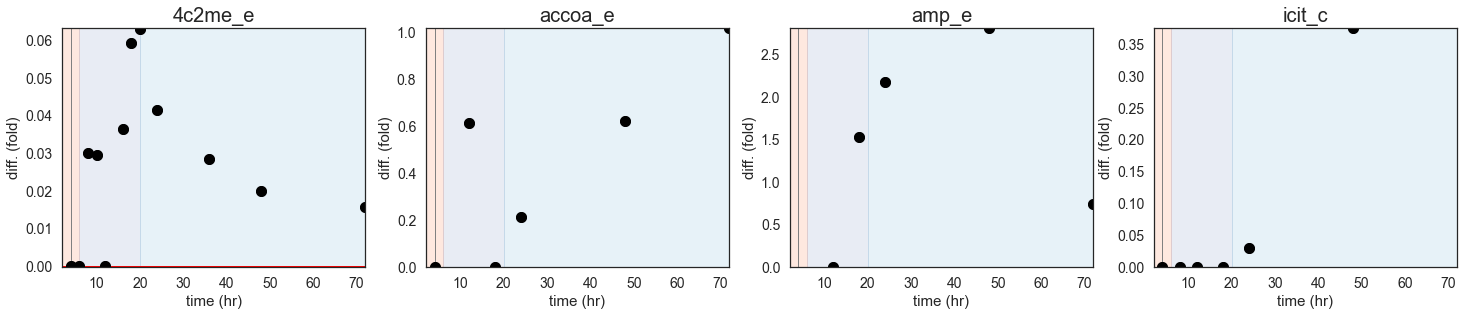

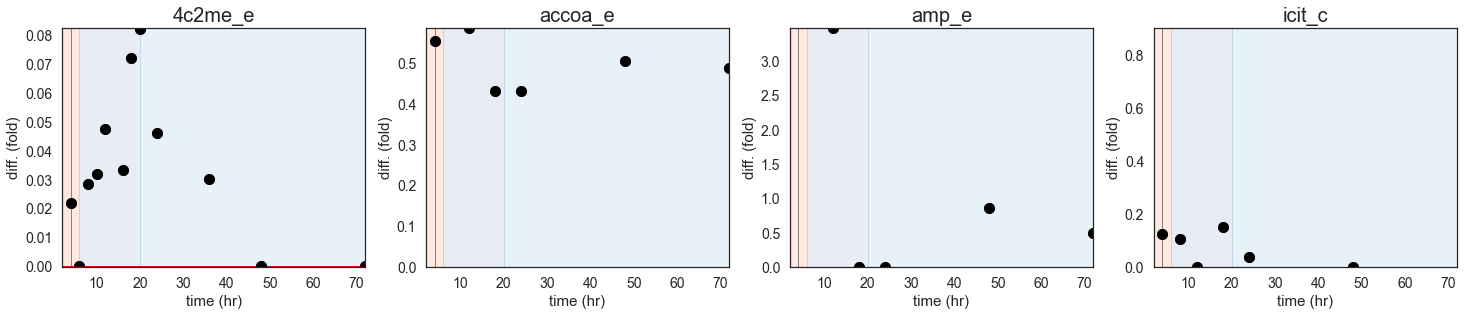

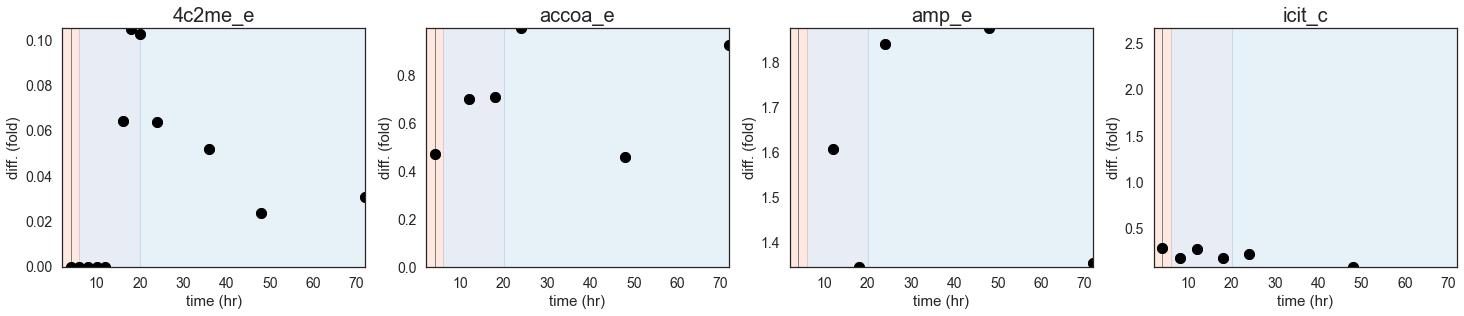

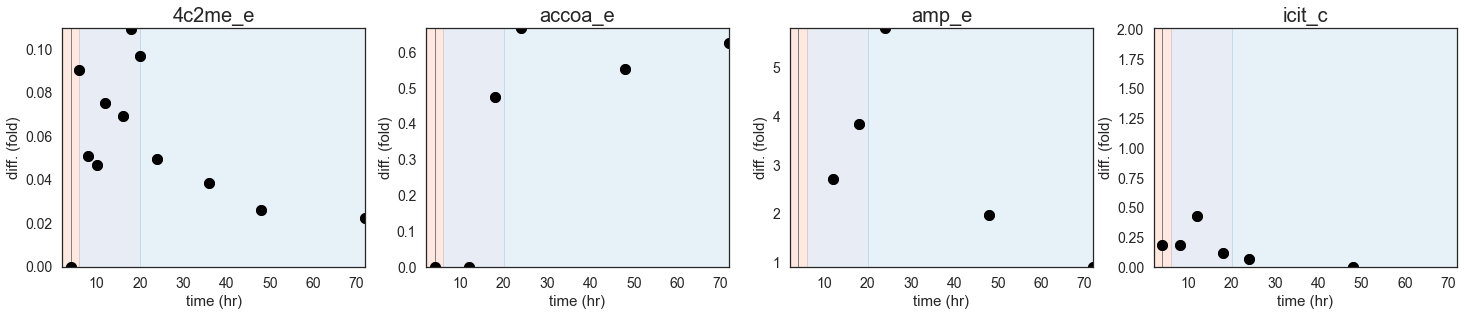

In [53]:
df = DF_MET_clustering[(DF_MET_clustering.ends_at_zero == False) & (DF_MET_clustering.starts_at_zero == True) 
                       & (DF_MET_clustering.leave_zero == True) & (DF_MET_clustering.return_to_zero == False)]

tmp_df = find_shifts_in_time(df, metabolomics_diff)

list_mets = tmp_df[~tmp_df.metabolite.isin(mevalonate_mets)].metabolite.unique()[:4]

# All = ['I1','I2','I3','L1','L2','L3','B1','B2']
plot_dynamic_profile_differences('all', list_mets, metabolomics_diff)

### Constant Change profile

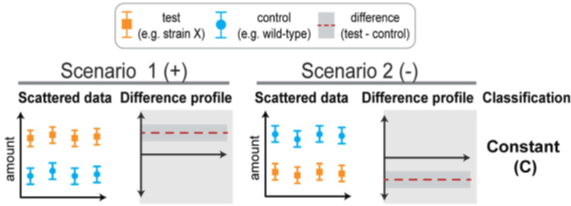

### The list of metabolites in the "Constant change" profile

In [54]:
DF_MET_clustering[(DF_MET_clustering.ends_at_zero == False) & (DF_MET_clustering.starts_at_zero == False) 
                       & (DF_MET_clustering.leave_zero == False) & (DF_MET_clustering.return_to_zero == False)]

strain metabolite  starts_at_zero  ends_at_zero  leave_zero  \
0       I1   glc__D_e           False         False           0   
2       I1     succ_e           False         False           0   
3       I1   lac__D_e           False         False           0   
4       I1      for_e           False         False           0   
6       I1    mev_R_c           False         False           0   
7       I1    5pmev_c           False         False           0   
8       I1     ipdp_c           False         False           0   
11      I1      amp_c           False         False           0   
12      I1      adp_c           False         False           0   
13      I1      atp_c           False         False           0   
14      I1      nad_c           False         False           0   
15      I1     nadp_c           False         False           0   
16      I1    accoa_c           False         False           0   
17      I1      fdp_c           False         False           0   
19      I1      pep_c           False         False           0   
20      I1      pyr_c           False         False           0   
21      I1   lac__D_c           False         False           0   
22      I1      fum_c           False         False           0   
23      I1     succ_c           False         False           0   
24      I1   mal__L_c           False         False           0   
26      I1  acon__C_c           False         False           0   
27      I1      cit_c           False         False           0   
29      I1      glx_c           False         False           0   
30      I1   glyclt_c           False         False           0   
34      I1      gly_c           False         False           0   
35      I1   ala__L_c           False         False           0   
36      I1   ser__L_c           False         False           0   
37      I1   pro__L_c           False         False           0   
38      I1   val__L_c           False         False           0   
40      I1   leu__L_c           False         False           0   
41      I1   ile__L_c           False         False           0   
42      I1   asn__L_c           False         False           0   
44      I1   gln__L_c           False         False           0   
47      I1   met__L_c           False         False           0   
48      I1   his__L_c           False         False           0   
49      I1   phe__L_c           False         False           0   
50      I1   arg__L_c           False         False           0   
51      I1   tyr__L_c           False         False           0   
52      I1   trp__L_c           False         False           0   
61      I2     succ_e           False         False           0   
62      I2   lac__D_e           False         False           0   
63      I2      for_e           False         False           0   
65      I2    mev_R_c           False         False           0   
66      I2    5pmev_c           False         False           0   
67      I2     ipdp_c           False         False           0   
70      I2      amp_c           False         False           0   
71      I2      adp_c           False         False           0   
72      I2      atp_c           False         False           0   
73      I2      nad_c           False         False           0   
74      I2     nadp_c           False         False           0   
75      I2    accoa_c           False         False           0   
76      I2      fdp_c           False         False           0   
77      I2      3pg_c           False         False           0   
78      I2      pep_c           False         False           0   
79      I2      pyr_c           False         False           0   
80      I2   lac__D_c           False         False           0   
81      I2      fum_c           False         False           0   
82      I2     succ_c           False         False           0   
83      I2   mal__L_c           False         False

C:\Users\A00016~1\AppData\Local\Temp\2/ipykernel_12752/1013023464.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for s in df[(DF_MET_clustering.metabolite == r)].strain.unique():


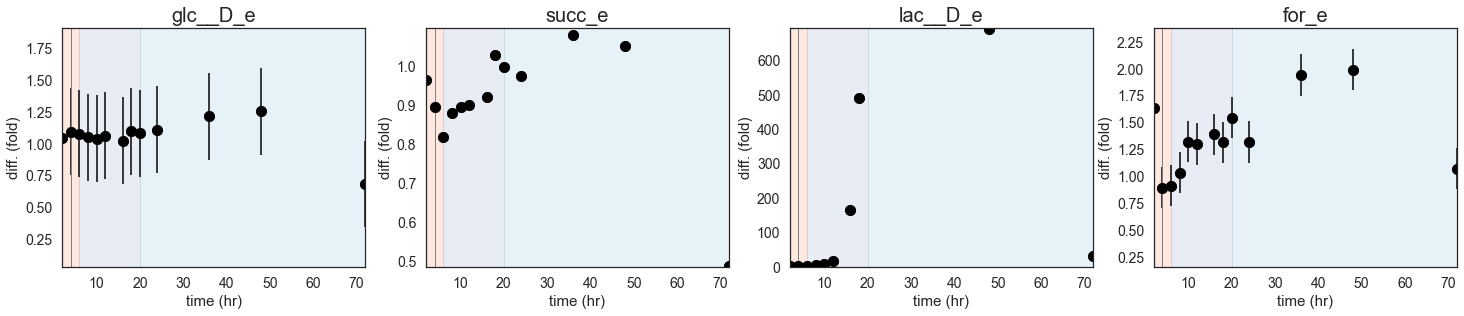

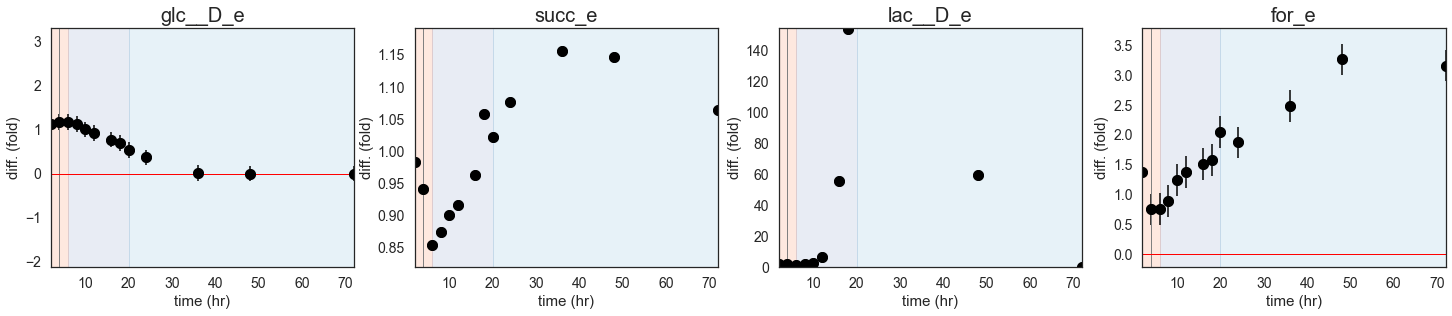

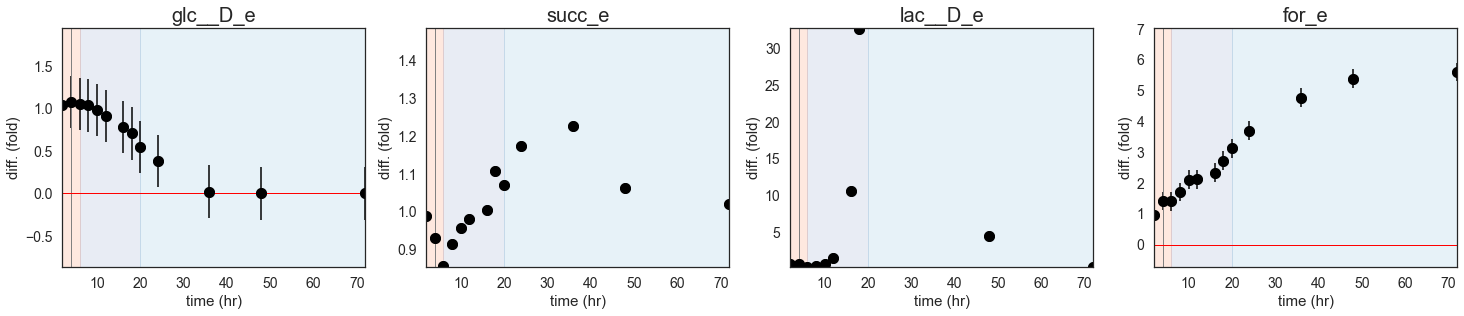

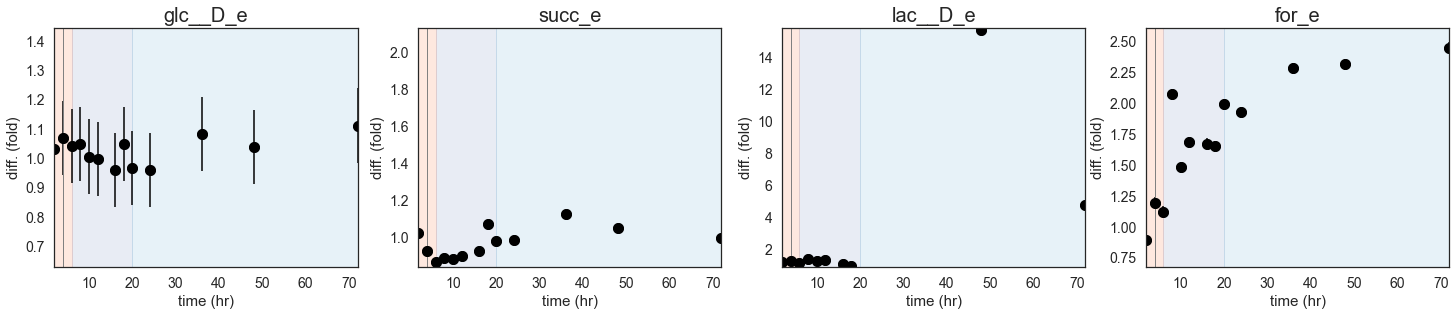

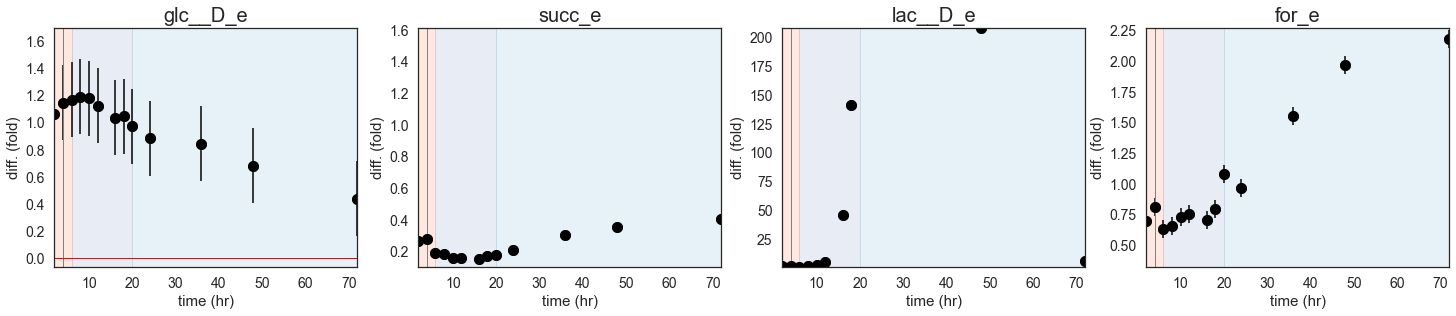

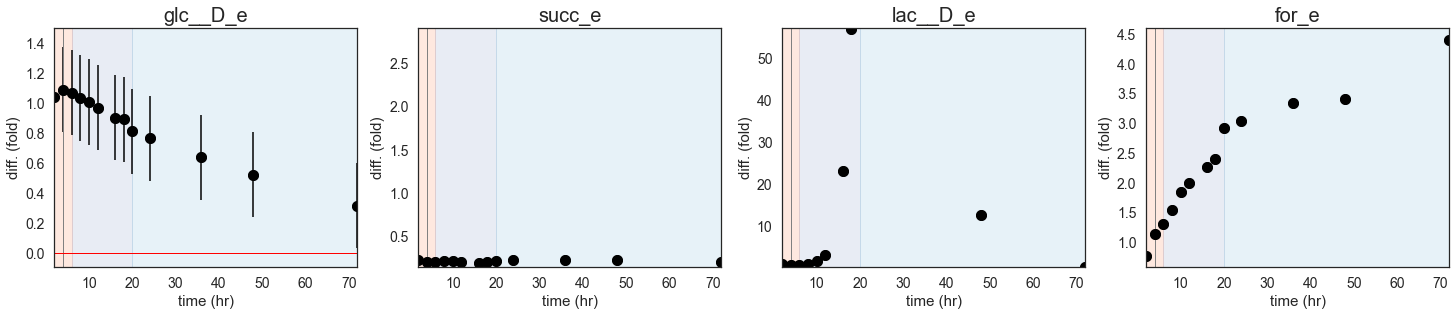

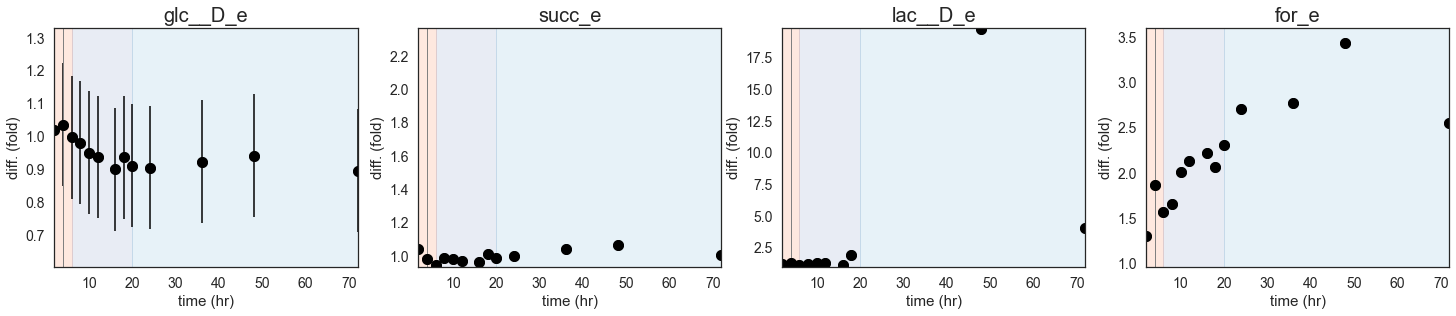

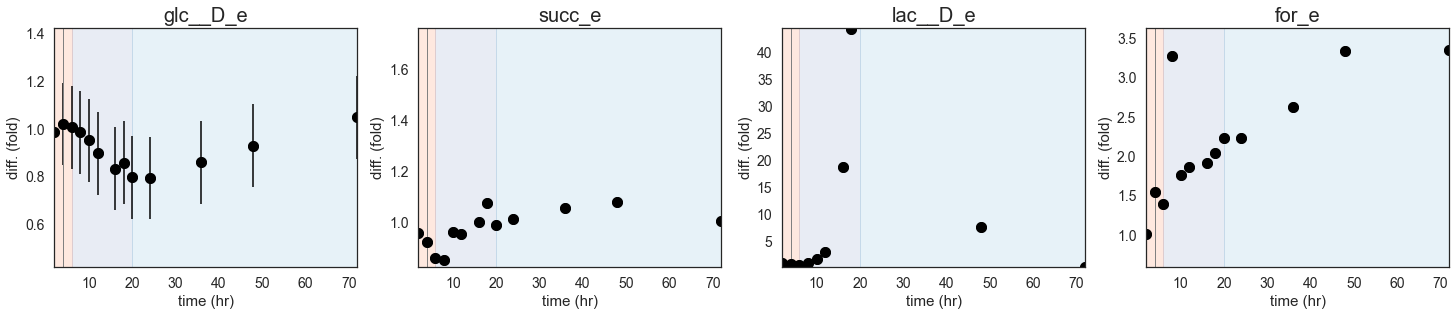

In [55]:
df = DF_MET_clustering[(DF_MET_clustering.ends_at_zero == False) & (DF_MET_clustering.starts_at_zero == False) 
                       & (DF_MET_clustering.leave_zero == False) & (DF_MET_clustering.return_to_zero == False)]

tmp_df = find_shifts_in_time(df, metabolomics_diff)

list_mets = tmp_df[~tmp_df.metabolite.isin(mevalonate_mets)].metabolite.unique()[:4]

# All = ['I1','I2','I3','L1','L2','L3','B1','B2']
plot_dynamic_profile_differences('all', list_mets, metabolomics_diff)

### Shift profile

In [56]:
DF_MET_clustering[(DF_MET_clustering.ends_at_zero == True) & (DF_MET_clustering.starts_at_zero == True) & 
                  (DF_MET_clustering.leave_zero == 1) & (DF_MET_clustering.return_to_zero == 1)]

strain metabolite  starts_at_zero  ends_at_zero  leave_zero  \
9       I1     grdp_c            True          True           1   
68      I2     grdp_c            True          True           1   
127     I3     grdp_c            True          True           1   
128     I3     frdp_c            True          True           1   
291     L2      coa_e            True          True           1   
328     L3    4c2me_c            True          True           1   
363     B1     grdp_c            True          True           1   
445     B2   2mecdp_c            True          True           1   

     return_to_zero  
9                 1  
68                1  
127               1  
128               1  
291               1  
328               1  
363               1  
445               1

C:\Users\A00016~1\AppData\Local\Temp\2/ipykernel_12752/1013023464.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for s in df[(DF_MET_clustering.metabolite == r)].strain.unique():


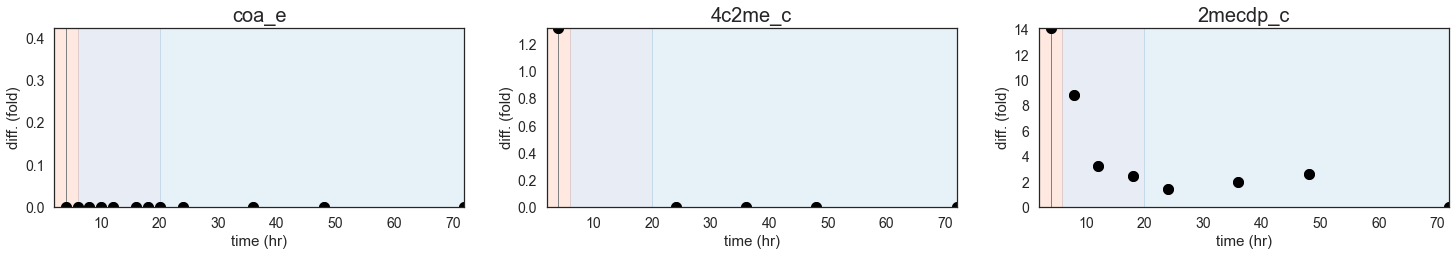

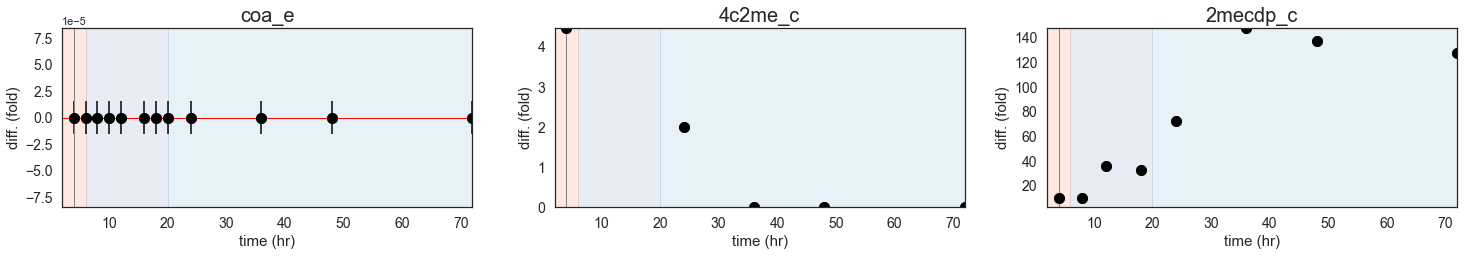

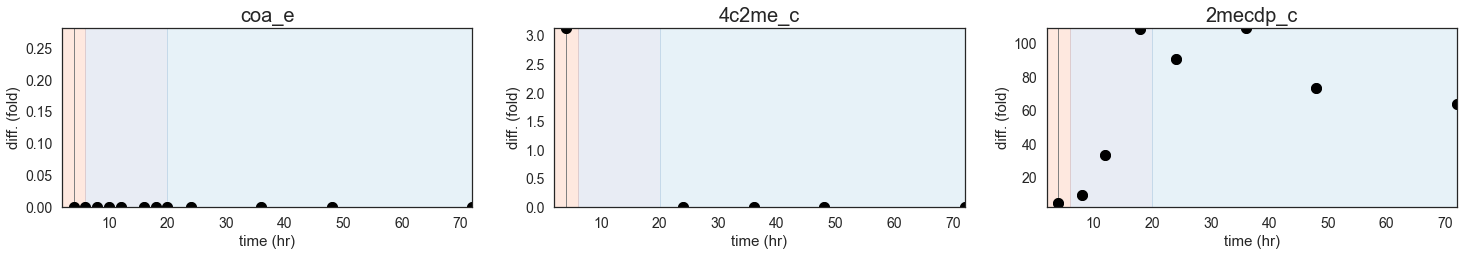

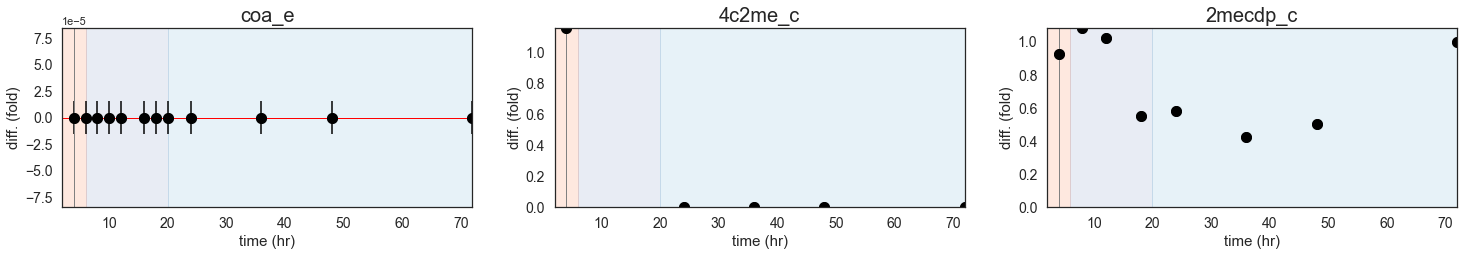

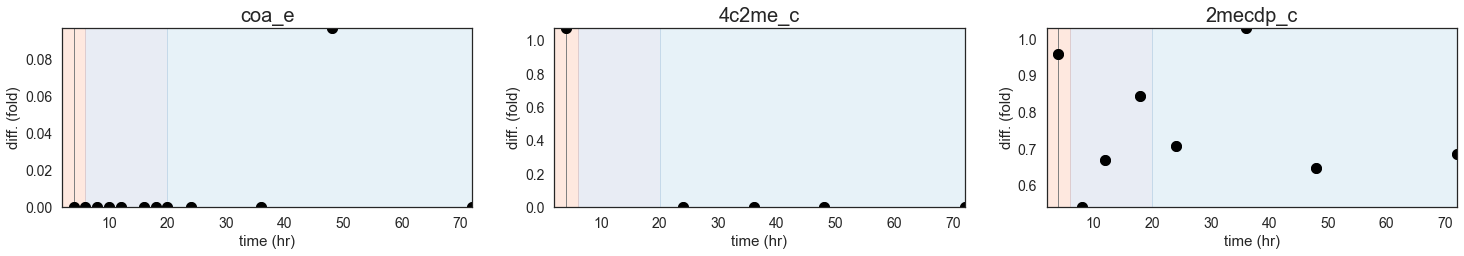

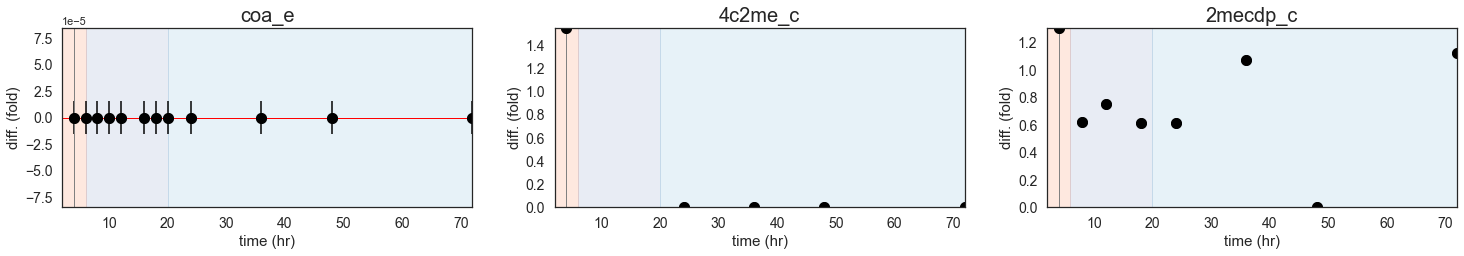

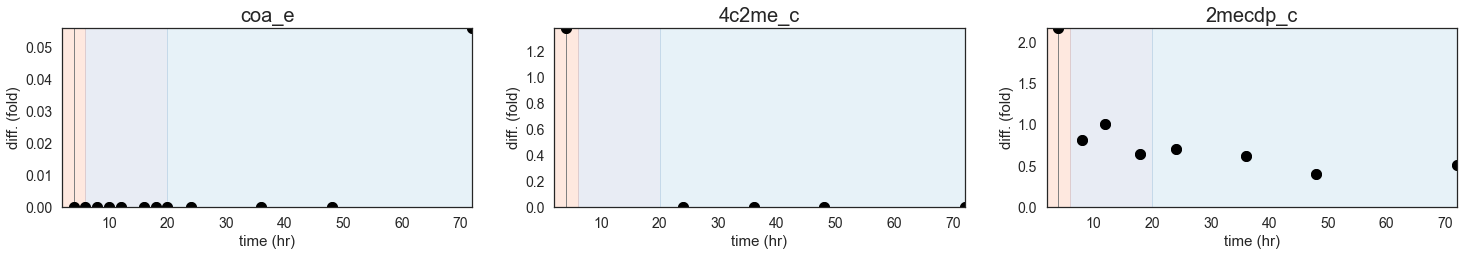

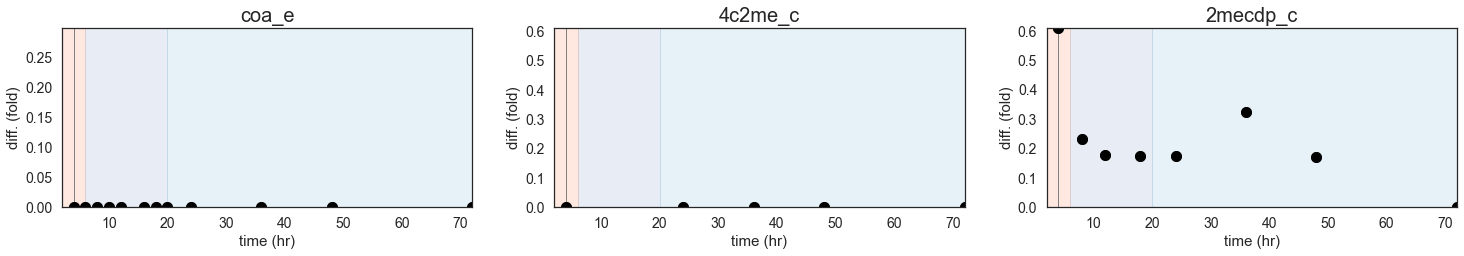

In [57]:
df = DF_MET_clustering[(DF_MET_clustering.ends_at_zero == True) & (DF_MET_clustering.starts_at_zero == True) & 
                  (DF_MET_clustering.leave_zero == 1) & (DF_MET_clustering.return_to_zero == 1)]

tmp_df = find_shifts_in_time(df, metabolomics_diff)

list_mets = tmp_df[~tmp_df.metabolite.isin(mevalonate_mets)].metabolite.unique()[:4]

# All = ['I1','I2','I3','L1','L2','L3','B1','B2']
plot_dynamic_profile_differences('all', list_mets, metabolomics_diff)